# IC_2023_Rafael_Rodrigues
## Tema: Clusterização de perfis

### Base de Dados SISVAN - Governo Federal do Brasil

### Cidade de Monte Sião/MG - 2022

# Seção 1: Preparação e visualização inicial da base de dados

Para ver a descrição completa dos dados e o processo de filtragem até este dataset importado, consulte o arquivo:

[filtrage_dados.ipynd](./filtragem_dados.ipynb)



## 1.1: Importação das bibliotecas iniciais

In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

## 1.2: Importação dos dados

In [48]:
df = pd.read_csv('dados_monte_siao_2022_filtrados.csv')

df

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN    CO_CNES  NU_IDADE_ANO  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689  2795396.0            52   
1     1DC24A843C4347557763139BA3660306D5651277  2795396.0            27   
2     56305BAB97DC8C5CD87469151615228CCC842BC4  2795396.0            27   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966  2795396.0            31   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2  2795396.0            44   
...                                        ...        ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7  7780311.0            68   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C  6373488.0            71   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C  2212889.0            56   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC  2213087.0            54   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986  2212889.0            58   

     DS_FASE_VIDA SG_SEXO DT_ACOMPANHAMENTO  NU_COMPETENCIA NU_PESO NU_ALTURA  \
0          ADULTO       F        07/01/2022          202201      53       157   
1          ADULTO       F        20/01/2022          202201      42       145   
2          ADULTO       M        17/01/2022          202201      70       180   
3          ADULTO       M        19/01/2022          202201      75       162   
4          ADULTO       M        17/01/2022          202201      95       162   
...           ...     ...               ...             ...     ...       ...   
3831        IDOSO       F        15/12/2022          202212      77       172   
3832        IDOSO       M        22/12/2022          202212      48       158   
3833       ADULTO       F        14/12/2022          202212    75,5       168   
3834       ADULTO       F        26/12/2022          202212      77       165   
3835       ADULTO       F        08/12/2022          202212    49,8       153   

     DS_IMC        CO_ESTADO_NUTRI  
0      21,5  Adequado ou eutrófico  
1     19,98  Adequado ou eutrófico  
2      21,6  Adequado ou eutrófico  
3     28,58              Sobrepeso  
4      36,2      Obesidade Grau II  
...     ...                    ...  
3831  26,03  Adequado ou eutrófico  
3832  19,23             Baixo peso  
3833  26,75              Sobrepeso  
3834  28,28              Sobrepeso  
3835  21,27  Adequado ou eutrófico  

[3836 rows x 12 columns]

## 1.3: Confirmar a ausencia de nulos

In [49]:
# Mostrar a contagem de NaN em todas as colunas
nan_count = df.isnull().sum()

# Exibir a contagem de NaN
print(nan_count)


CO_ACOMPANHAMENTO    0
CO_PESSOA_SISVAN     0
CO_CNES              0
NU_IDADE_ANO         0
DS_FASE_VIDA         0
SG_SEXO              0
DT_ACOMPANHAMENTO    0
NU_COMPETENCIA       0
NU_PESO              0
NU_ALTURA            0
DS_IMC               0
CO_ESTADO_NUTRI      0
dtype: int64


# Seção 2 - Análise Inicial dos Dados

Nesta seção, será realizada uma análise preliminar dos dados para compreender a estrutura e características do conjunto de dados importado. Serão explorados aspectos como tipos de variáveis, distribuição estatísticas e visualizações descritivas.

## 2.1 - Verficar se os dados sao de apenas 2022

In [50]:
# Importar a coluna D'DT_ACOMPANHAMENTO' 
df['DT_ACOMPANHAMENTO'] = pd.to_datetime(df['DT_ACOMPANHAMENTO'], format='%d/%m/%Y')

# Extraia o ano de cada data
df['ANO_ACOMPANHAMENTO'] = df['DT_ACOMPANHAMENTO'].dt.year

# Analise a distribuição dos anos
anos_presentes = df['ANO_ACOMPANHAMENTO'].unique()

# Imprima os anos presentes
print(f'Anos presentes nos dados: {anos_presentes}')


Anos presentes nos dados: [2022]


## 2.2 Análise de idade

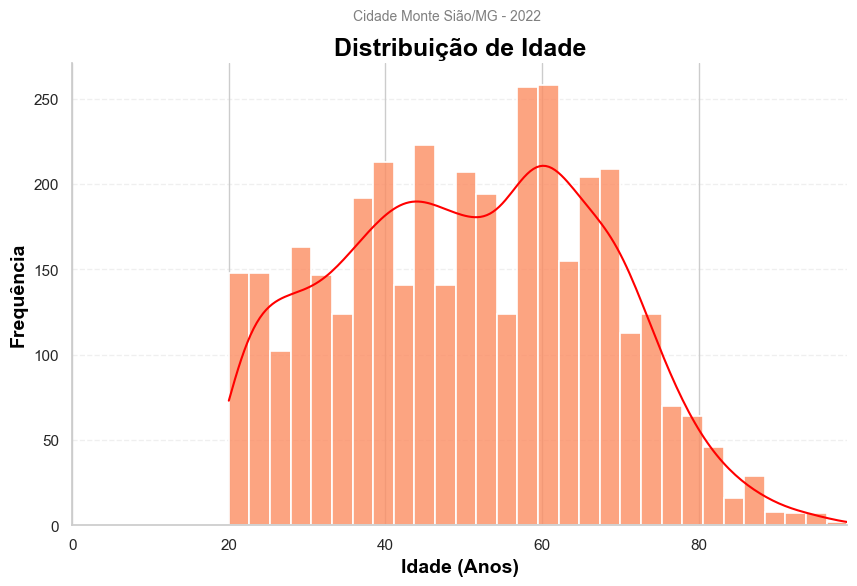

In [51]:
# Convertendo a coluna 'NU_IDADE_ANO' para int64
df['NU_IDADE_ANO'] = pd.to_numeric(df['NU_IDADE_ANO'], errors='coerce').astype('Int64')

# Estilo 
sns.set_style("whitegrid")

# Escolhendo uma paleta de cores mais intensa (excluindo rosa e roxo)
sns.set_palette(sns.color_palette("Set2", 10).as_hex()[::-1][:8])
color = sns.color_palette()[0]  

# Criando o histograma 
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='NU_IDADE_ANO', bins=30, kde=True, color=color, alpha=0.8, edgecolor='w', linewidth=1.2)

# Ajustando a cor da linha kde (Kernel Density Estimation)
for line in ax.lines:
    line.set_color('red')

# Adicionando título e subtítulo centralizados
plt.title('Distribuição de Idade', fontsize=18, fontweight='bold', color='black', ha='center')
plt.suptitle('Cidade Monte Sião/MG - 2022', fontsize=10, y=0.97, color='grey', ha='center')

# Definindo limites dos eixos x e y para iniciar de 0
plt.xlim(0, df['NU_IDADE_ANO'].max())
plt.ylim(0, plt.ylim()[1])

# Adicionando rótulos aos eixos
plt.xlabel('Idade (Anos)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Frequência', fontsize=14, fontweight='bold', color='black')

# Adicionando grid ao fundo do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.3)

sns.despine()

# Exibindo o gráfico
plt.show()


## 2.3 Análise de fase da vida

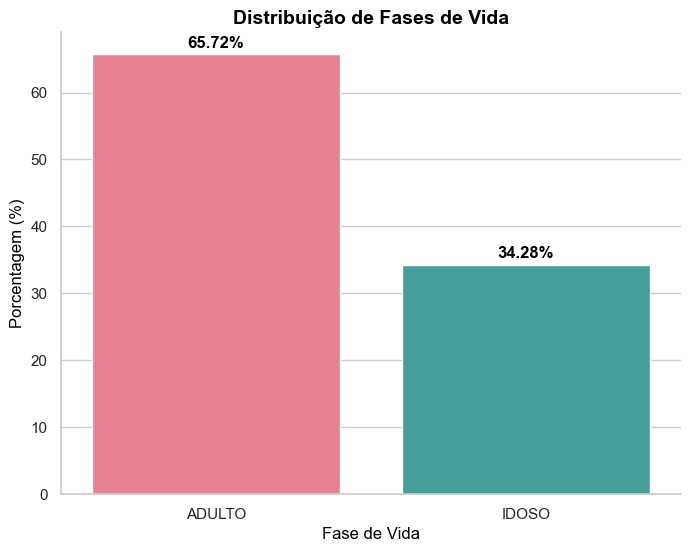

In [52]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

# Agrupando por fase de vida e contando o número de ocorrências
group_counts = df['DS_FASE_VIDA'].value_counts()

# Calculando a porcentagem de cada fase
group_percentages = group_counts / group_counts.sum() * 100

# Escolhendo uma paleta de cores diferente para cada barra
colors = sns.color_palette("husl", len(group_percentages))

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)

# Adicionando rótulos e título
plt.title('Distribuição de Fases de Vida', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Fase de Vida', fontsize=12, color='black')
plt.ylabel('Porcentagem (%)', fontsize=12, color='black')

# Adicionando etiquetas de porcentagem acima de cada barra
for i, percentage in enumerate(group_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', color='black', fontweight='bold')

sns.despine()

# Exibindo o gráfico
plt.show()


## 2.4 Análise de sexo

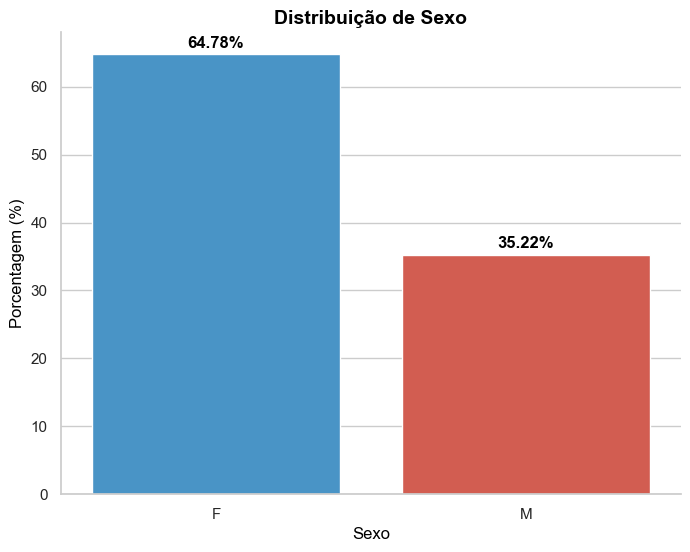

In [53]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

# Agrupando por fase de vida e contando o número de ocorrências
group_counts = df['SG_SEXO'].value_counts()

# Calculando a porcentagem de cada fase
group_percentages = group_counts / group_counts.sum() * 100

colors = ["#3498db", "#e74c3c"]  

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=group_percentages.index, y=group_percentages, palette=colors)

# Adicionando rótulos e título
plt.title('Distribuição de Sexo', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Sexo', fontsize=12, color='black')
plt.ylabel('Porcentagem (%)', fontsize=12, color='black')

# Adicionando etiquetas de porcentagem acima de cada barra
for i, percentage in enumerate(group_percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', color='black', fontweight='bold')

sns.despine()

# Exibindo o gráfico
plt.show()

## 2.5 Cast de strings para float nas colunas abaixo

In [54]:
# Transformando dados de object para float
df['NU_PESO'] = pd.to_numeric(df['NU_PESO'].str.replace(',', '.'), errors='coerce')
df['NU_ALTURA'] = pd.to_numeric(df['NU_ALTURA'].str.replace(',', '.'), errors='coerce')
df['DS_IMC'] = pd.to_numeric(df['DS_IMC'].str.replace(',', '.'), errors='coerce')

## 2.6 Análise descritiva das colunas numericas

In [55]:
# Aplica o describe nas três colunas
descricao = df[['NU_PESO', 'NU_ALTURA', 'DS_IMC']].describe().round(2)

# Imprime as estatísticas descritivas
print(descricao)

       NU_PESO  NU_ALTURA   DS_IMC
count  3836.00    3836.00  3836.00
mean     75.43     163.06    28.33
std      17.44       9.32     5.92
min       0.87      70.00     0.00
25%      64.00     156.00    24.44
50%      73.15     163.00    27.55
75%      85.00     169.00    31.25
max     220.00     197.00    67.15


A análise descritiva dos dados revela  as características presentes no conjunto de dados. Para a variável `NU_PESO`, observa-se que a média é de aproximadamente 75.43 kg, com um desvio padrão de cerca de 17.44 kg. A distribuição mostra que o peso varia de 0.87 kg a 220 kg. Considerando que o conjunto de dados tem somente adultos e idosos, não tem como saber a natureza dessa amostra unica.

Quanto à variável `NU_ALTURA`, a média é aproximadamente 163.06 cm, com um desvio padrão de cerca de 9.32 cm. As alturas variam entre 70 cm e 197 cm, refletindo uma ampla gama de estaturas no conjunto de amostras.

No que diz respeito ao Índice de Massa Corporal (`DS_IMC`), a média é de aproximadamente 28.33, com um desvio padrão de cerca de 5.92. A faixa do IMC abrange de 0.00 a 67.15.

O primeiro quartil (25%) para a variável NU_PESO indica que 25% das observações de peso estão abaixo de aproximadamente 64 kg. O segundo quartil (50%), que corresponde à mediana, revela que metade das observações possui peso inferior a 73.15 kg. Por fim, o terceiro quartil (75%) mostra que 75% das observações têm peso inferior a 85 kg.

Para a variável NU_ALTURA, os quartis indicam que 25% das observações possuem altura inferior a 156 cm (primeiro quartil), 50% têm altura inferior a 163 cm (mediana) e 75% possuem altura inferior a 169 cm (terceiro quartil).

Analisando o Índice de Massa Corporal (DS_IMC), o primeiro quartil revela que 25% das observações apresentam um IMC inferior a 24.44, enquanto o segundo quartil (mediana) indica que 50% têm um IMC inferior a 27.55. Por fim, o terceiro quartil destaca que 75% das observações possuem um IMC inferior a 31.25.

## 2.7 Análise descritiva das colunas categoricas

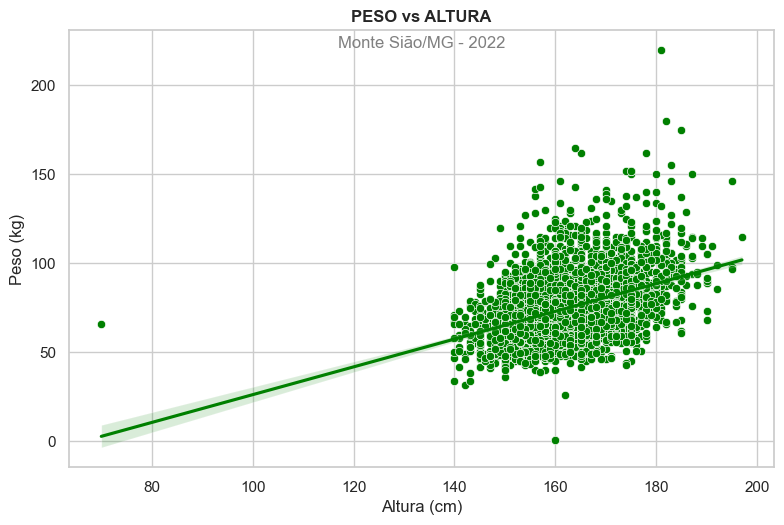

In [56]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_PESO em relação a NU_ALTURA
plt.subplot(3, 1, 1)
sns.scatterplot(x='NU_ALTURA', y='NU_PESO', data=df, color='green')
sns.regplot(x='NU_ALTURA', y='NU_PESO', data=df, scatter=False, color='green')
plt.title('PESO vs ALTURA', fontweight='bold')  
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()

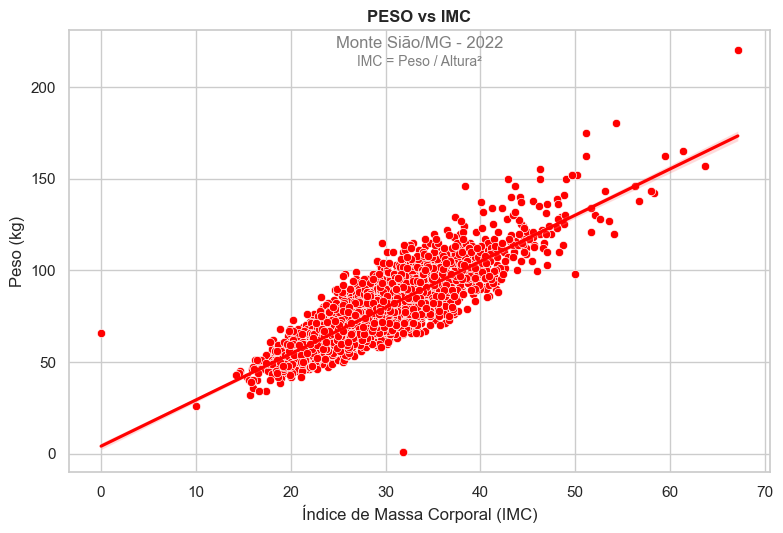

In [57]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_PESO em relação a DS_IMC
plt.subplot(3, 1, 2)
sns.scatterplot(x='DS_IMC', y='NU_PESO', data=df, color='red')
sns.regplot(x='DS_IMC', y='NU_PESO', data=df, scatter=False, color='red')
plt.title('PESO vs IMC', fontweight='bold')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Peso (kg)')
plt.annotate('IMC = Peso / Altura²', xy=(0.5, 0.92), xycoords='axes fraction', ha='center', fontsize=10, color='gray')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()

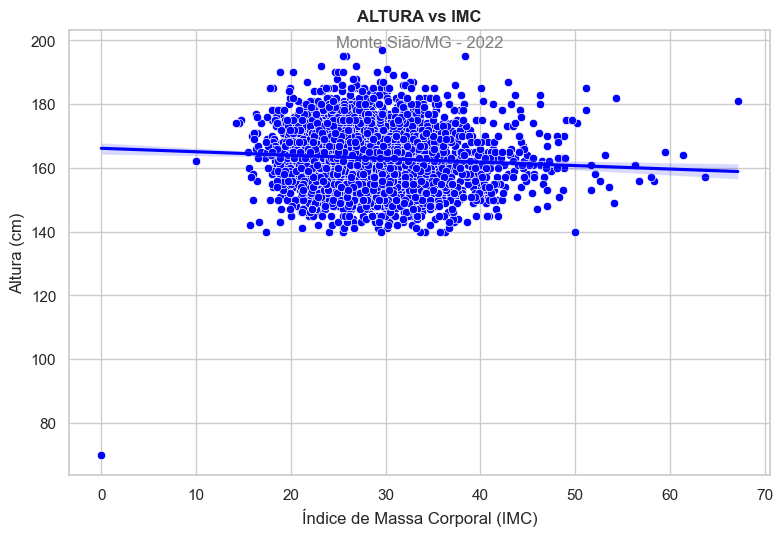

In [58]:
plt.figure(figsize=(8, 15))

# Scatter Plot para NU_ALTURA em relação a DS_IMC
plt.subplot(3, 1, 3)
sns.scatterplot(x='DS_IMC', y='NU_ALTURA', data=df, color='blue')
sns.regplot(x='DS_IMC', y='NU_ALTURA', data=df, scatter=False, color='blue')
plt.title('ALTURA vs IMC', fontweight='bold')
plt.xlabel('Índice de Massa Corporal (IMC)')
plt.ylabel('Altura (cm)')
plt.tight_layout()

# Adicionando subtítulo abaixo do título principal
plt.annotate('Monte Sião/MG - 2022', xy=(0.5, 0.96), xycoords='axes fraction', ha='center', fontsize=12, color='gray')

plt.show()

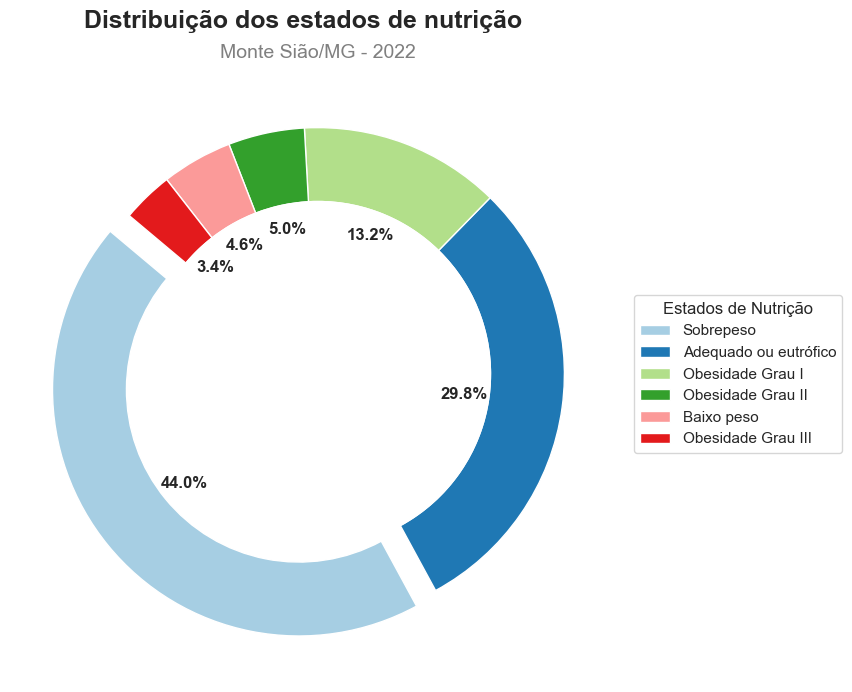

In [59]:
# Contagem dos estados de nutrição
contagem_estados = df['CO_ESTADO_NUTRI'].value_counts()

# Cálculo das porcentagens
porcentagens = contagem_estados / contagem_estados.sum() * 100

# Cores para o gráfico de donut
cores = plt.cm.Paired.colors

# Adiciona uma explosão para destacar uma fatia
explode = (0.1, 0, 0, 0, 0, 0)

# Ajustes visuais para tornar o gráfico mais bonito
plt.figure(figsize=(12, 8))

# Gráfico de donut
wedges, texts, autotexts = plt.pie(porcentagens, autopct='%1.1f%%', startangle=140, colors=cores, explode=explode,
                                  wedgeprops=dict(width=0.3), textprops={'weight': 'bold'})

# Adiciona um círculo branco no centro para criar um donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adiciona uma caixa de legenda ao lado
plt.legend(porcentagens.index, title='Estados de Nutrição', bbox_to_anchor=(1, 0.5), loc='center left')

# Adiciona título centralizado e subtítulo
plt.suptitle('Distribuição dos estados de nutrição', x=0.5, y=0.95, fontsize=18, ha='center', fontweight='bold')
plt.title('Monte Sião/MG - 2022', fontsize=14, color='gray')

plt.show()


# Seção 3 - Tratamento do conjunto de dados

## 3.1 Label Encoding (Codificação de Rótulos)

In [67]:
# Criando uma cópia do DataFrame original
df_clusterization = df.copy()

# Passo 1: Codificação das colunas categóricas
le = LabelEncoder()

df_clusterization['DS_FASE_VIDA'] = le.fit_transform(df_clusterization['DS_FASE_VIDA'])
df_clusterization['SG_SEXO'] = le.fit_transform(df_clusterization['SG_SEXO'])
df_clusterization['CO_ESTADO_NUTRI'] = le.fit_transform(df_clusterization['CO_ESTADO_NUTRI'])

# Passo 2: Exclusão das colunas desnecessárias
colunas_desnecessarias = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
df_clusterization = df_clusterization.drop(colunas_desnecessarias, axis=1)

df_clusterization

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689            52             0   
1     1DC24A843C4347557763139BA3660306D5651277            27             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4            27             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966            31             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2            44             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7            68             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C            71             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C            56             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC            54             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986            58             0   

      SG_SEXO  NU_PESO  NU_ALTURA  DS_IMC  CO_ESTADO_NUTRI  ANO_ACOMPANHAMENTO  
0           0     53.0      157.0   21.50                0                2022  
1           0     42.0      145.0   19.98                0                2022  
2           1     70.0      180.0   21.60                0                2022  
3           1     75.0      162.0   28.58                5                2022  
4           1     95.0      162.0   36.20                3                2022  
...       ...      ...        ...     ...              ...                 ...  
3831        0     77.0      172.0   26.03                0                2022  
3832        1     48.0      158.0   19.23                1                2022  
3833        0     75.5      168.0   26.75                5                2022  
3834        0     77.0      165.0   28.28                5                2022  
3835        0     49.8      153.0   21.27                0                2022  

[3836 rows x 10 columns]

## 3.2 Normalização dos dados

In [68]:
from sklearn.preprocessing import StandardScaler

df_normalized = df_clusterization.copy()

# Seleciona as colunas para normalização
colunas_normalizar = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']
df_normalized[colunas_normalizar] = StandardScaler().fit_transform(df_normalized[colunas_normalizar])

# Resultado final
df_normalized

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689      0.071121             0   
1     1DC24A843C4347557763139BA3660306D5651277     -1.417755             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4     -1.417755             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966     -1.179535             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2     -0.405319             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7      1.024003             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C      1.202668             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C      0.309342             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC      0.190232             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986      0.428452             0   

      SG_SEXO   NU_PESO  NU_ALTURA    DS_IMC  CO_ESTADO_NUTRI  \
0           0 -1.286232  -0.650486 -1.154594                0   
1           0 -1.917052  -1.938020 -1.411469                0   
2           1 -0.311329   1.817289 -1.137695                0   
3           1 -0.024592  -0.114013  0.041901                5   
4           1  1.122353  -0.114013  1.329653                3   
...       ...       ...        ...       ...              ...   
3831        0  0.090102   0.958932 -0.389040                0   
3832        1 -1.572968  -0.543191 -1.538216                1   
3833        0  0.004081   0.529754 -0.267363                5   
3834        0  0.090102   0.207871 -0.008798                5   
3835        0 -1.469743  -1.079664 -1.193463                0   

      ANO_ACOMPANHAMENTO  
0                   2022  
1                   2022  
2                   2022  
3                   2022  
4                   2022  
...                  ...  
3831                2022  
3832                2022  
3833                2022  
3834                2022  
3835                2022  

[3836 rows x 10 columns]

In [69]:
from scipy.stats import zscore

# Recalcular Z-score
z_scores = df_normalized[colunas_normalizar].apply(zscore)

# Filtrar linhas onde todos os Z-scores estão entre -3 e 3
df_normalized = df_normalized[(z_scores.abs() < 3).all(axis=1)]

# Resultado final sem outliers
df_normalized

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN  NU_IDADE_ANO  DS_FASE_VIDA  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689      0.071121             0   
1     1DC24A843C4347557763139BA3660306D5651277     -1.417755             0   
2     56305BAB97DC8C5CD87469151615228CCC842BC4     -1.417755             0   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966     -1.179535             0   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2     -0.405319             0   
...                                        ...           ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7      1.024003             1   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C      1.202668             1   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C      0.309342             0   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC      0.190232             0   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986      0.428452             0   

      SG_SEXO   NU_PESO  NU_ALTURA    DS_IMC  CO_ESTADO_NUTRI  \
0           0 -1.286232  -0.650486 -1.154594                0   
1           0 -1.917052  -1.938020 -1.411469                0   
2           1 -0.311329   1.817289 -1.137695                0   
3           1 -0.024592  -0.114013  0.041901                5   
4           1  1.122353  -0.114013  1.329653                3   
...       ...       ...        ...       ...              ...   
3831        0  0.090102   0.958932 -0.389040                0   
3832        1 -1.572968  -0.543191 -1.538216                1   
3833        0  0.004081   0.529754 -0.267363                5   
3834        0  0.090102   0.207871 -0.008798                5   
3835        0 -1.469743  -1.079664 -1.193463                0   

      ANO_ACOMPANHAMENTO  
0                   2022  
1                   2022  
2                   2022  
3                   2022  
4                   2022  
...                  ...  
3831                2022  
3832                2022  
3833                2022  
3834                2022  
3835                2022  

[3764 rows x 10 columns]

## 3.3 Analise de correlação Spearman (mais adequada para dados categoricos)

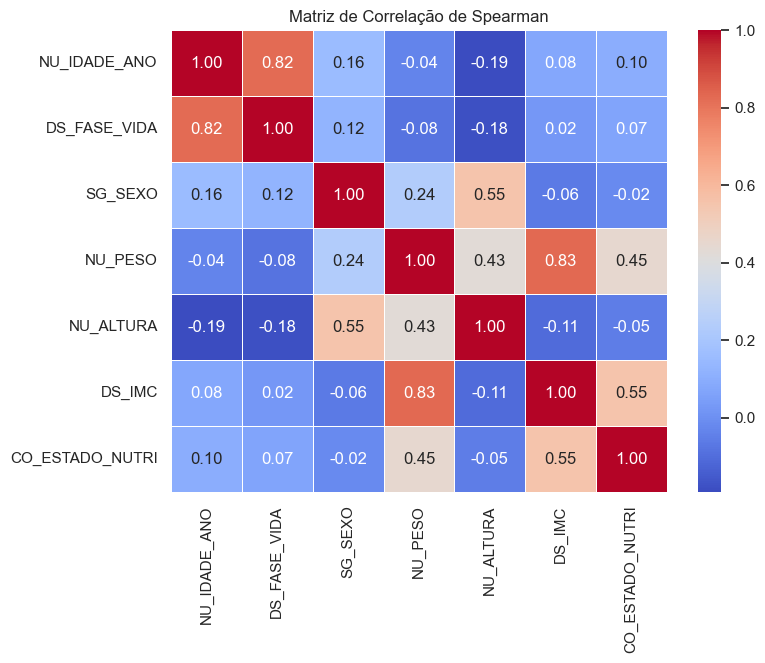

In [73]:
# Colunas de interesse
columns_of_interest = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']
df_selected = df_normalized[columns_of_interest]

# Calcula a correlação de Spearman
correlation_matrix_spearman = df_selected.corr(method='spearman')

# Cria um gráfico de calor com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação de Spearman')
plt.show()

# Seção 4 - Agrupamentos

## 4.1 KPrototype

De acordo com Tzung-Pei Hong & Outros (2015), o KPrototypes é uma generalização que combina o KMeans tradicional para variáveis numéricas e o KModes para variáveis categóricas. Ele utiliza uma abordagem híbrida, permitindo que diferentes tipos de dados contribuam para a dissimilaridade entre clusters. Útil quando o conjunto de dados possui uma mistura de variáveis categóricas e numéricas. Aplicações incluem análise de mercado, agrupamento de perfis de clientes com informações demográficas e comportamentais.

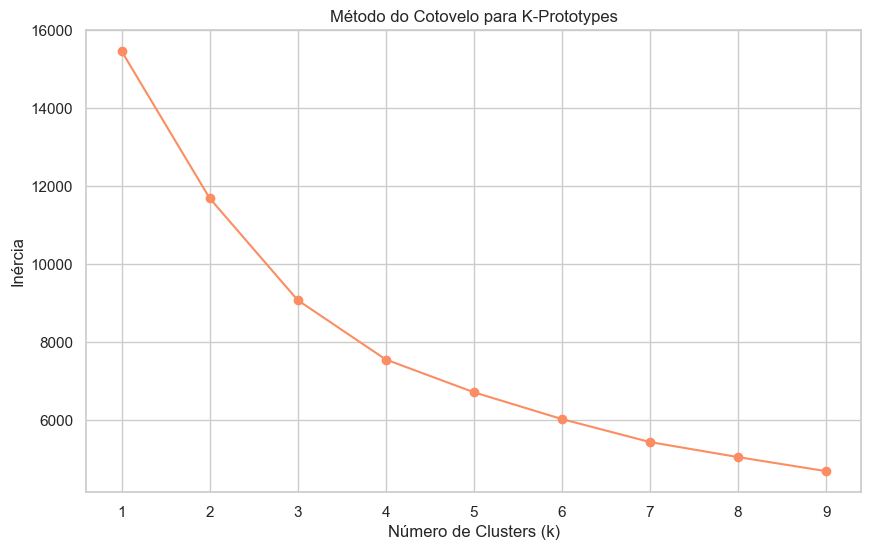

In [74]:
warnings.filterwarnings('ignore')

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Normaliza os dados
df_kprototype = df_normalized[colunas_clusterizar]

# Lista para armazenar os valores de k e inércia
inercia = []

# Faixa de valores de k que você deseja testar
faixa_k = range(1, 10)

# Aplica o K-Prototypes para diferentes valores de k
for k in faixa_k:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=10, verbose=0)
    kproto.fit_predict(df_kprototype, categorical=[1, 2, 6])
    inercia.append(kproto.cost_)

# Visualiza o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(faixa_k, inercia, marker='o')
plt.title('Método do Cotovelo para K-Prototypes')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

In [75]:
warnings.filterwarnings('ignore')

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Separa os dados
df_kprototype[colunas_clusterizar]

# Especifica o número de clusters desejado (k=4)
n_clusters = 4

# Cria uma instância do K-Prototypes
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=10, verbose=2)

# Aplica o K-Prototypes aos dados
clusters = kproto.fit_predict(df_kprototype, categorical=[1, 2, 6])

# Adiciona os rótulos dos clusters de volta ao DataFrame
df_kprototype['Cluster_KPrototype'] = clusters

# Visualiza o resultado
df_kprototype

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 940, ncost: 8536.102154730035
Run: 1, iteration: 2/100, moves: 717, ncost: 7921.838910251758
Run: 1, iteration: 3/100, moves: 427, ncost: 7678.59147294352
Run: 1, iteration: 4/100, moves: 250, ncost: 7581.047595839334
Run: 1, iteration: 5/100, moves: 129, ncost: 7561.687985883987
Run: 1, iteration: 6/100, moves: 51, ncost: 7558.493219540917
Run: 1, iteration: 7/100, moves: 20, ncost: 7557.6553744397615
Run: 1, iteration: 8/100, moves: 11, ncost: 7557.4799452062225
Run: 1, iteration: 9/100, moves: 3, ncost: 7557.467725672289
Run: 1, iteration: 10/100, moves: 0, ncost: 7557.467725672289
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1315, ncost: 7874.210374013819
Run: 2, iteration: 2/100, moves: 471, ncost: 7692.261178573496
Run: 2, iter

NU_IDADE_ANO  DS_FASE_VIDA  SG_SEXO   NU_PESO  NU_ALTURA    DS_IMC  \
0         0.071121             0        0 -1.286232  -0.650486 -1.154594   
1        -1.417755             0        0 -1.917052  -1.938020 -1.411469   
2        -1.417755             0        1 -0.311329   1.817289 -1.137695   
3        -1.179535             0        1 -0.024592  -0.114013  0.041901   
4        -0.405319             0        1  1.122353  -0.114013  1.329653   
...            ...           ...      ...       ...        ...       ...   
3831      1.024003             1        0  0.090102   0.958932 -0.389040   
3832      1.202668             1        1 -1.572968  -0.543191 -1.538216   
3833      0.309342             0        0  0.004081   0.529754 -0.267363   
3834      0.190232             0        0  0.090102   0.207871 -0.008798   
3835      0.428452             0        0 -1.469743  -1.079664 -1.193463   

      CO_ESTADO_NUTRI  Cluster_KPrototype  
0                   0                   3  
1                   0                   3  
2                   0                   1  
3                   5                   3  
4                   3                   2  
...               ...                 ...  
3831                0                   1  
3832                1                   0  
3833                5                   1  
3834                5                   1  
3835                0                   3  

[3764 rows x 8 columns]

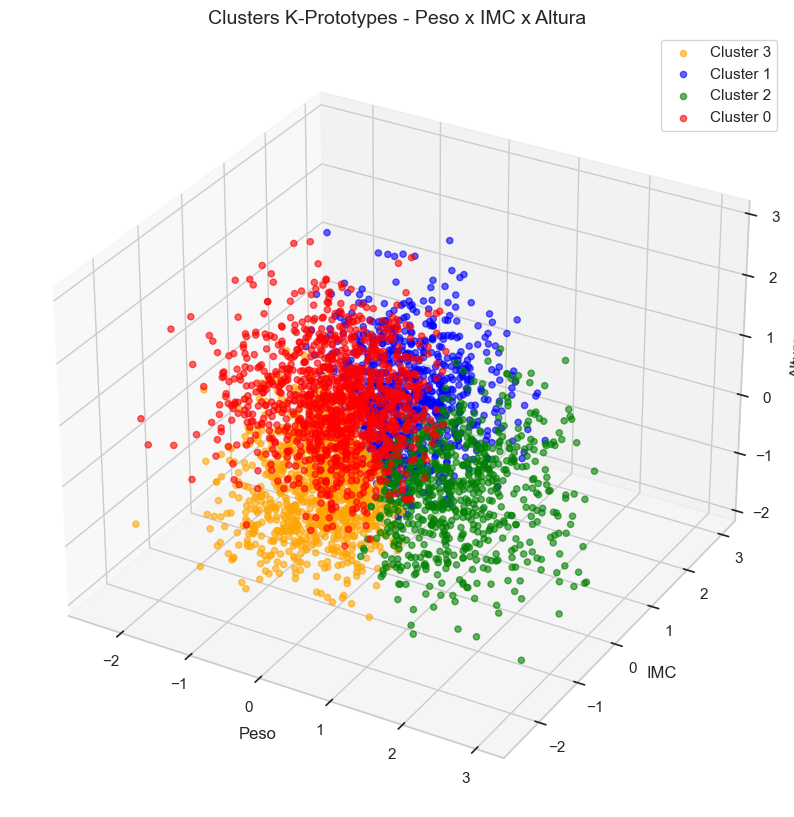

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define cores para clusters
cores = ['red', 'blue', 'green', 'orange']

# A partir do seu df_kprototype com os clusters já calculados
fig = plt.figure(figsize=(10, 18))
ax = fig.add_subplot(111, projection='3d')

# Itera sobre os clusters e plota cada grupo com cor diferente
for cluster in df_kprototype['Cluster_KPrototype'].unique():
    dados = df_kprototype[df_kprototype['Cluster_KPrototype'] == cluster]
    ax.scatter(dados['DS_IMC'], dados['NU_ALTURA'], dados['NU_IDADE_ANO'],
               label=f'Cluster {cluster}', alpha=0.6, color=cores[cluster])

# Adiciona título e rótulos aos eixos
ax.set_title('Clusters K-Prototypes - Peso x IMC x Altura', fontsize=14)
ax.set_xlabel('Peso')
ax.set_ylabel('IMC')
ax.set_zlabel('Altura')

# Exibe a legenda
ax.legend()

# Exibe o gráfico
plt.show()

## 4.2 PCA - KPrototype

PCA é uma técnica de redução de dimensionalidade que transforma as variáveis originais em um conjunto menor de variáveis (componentes principais) que mantêm a maior parte da variabilidade dos dados. Ao aplicar o PCA antes do KPrototypes, é possível reduzir a dimensionalidade do conjunto de dados, preservando ao mesmo tempo as informações mais significativas. Isso é particularmente útil quando lidamos com conjuntos de dados heterogêneos que possuem variáveis numéricas e categóricas. (Jolliffe, I. T., 2002)

De acordo com Tzung-Pei Hong & Outros (2015), a redução de dimensionalidade pode ajudar a remover ruídos e redundâncias nos dados.Com menos variáveis, o KPrototypes pode ser mais eficaz na identificação de padrões em conjuntos de dados complexos.

In [84]:
from sklearn.decomposition import PCA

# 1. Cópia do DataFrame original
df_pca_kprototype = df_normalized.copy()

# 2. SEPARAÇÃO CORRETA DAS VARIÁVEIS:
# Numéricas para PCA 
colunas_numericas_pca = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']  

# Categóricas para K-Prototypes
colunas_categoricas = ['DS_FASE_VIDA', 'SG_SEXO', 'CO_ESTADO_NUTRI']  

# 3. APLICA PCA NAS NUMÉRICAS:
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_pca_kprototype[colunas_numericas_pca])

# 4. CRIA NOVO DATAFRAME PARA CLUSTERIZAÇÃO:
df_cluster = pd.DataFrame({
    'PCA_1': componentes_principais[:, 0],
    'PCA_2': componentes_principais[:, 1],
    # Adiciona todas as colunas categóricas:
    **{col: df_pca_kprototype[col] for col in colunas_categoricas}
})

# 5. APLICA K-PROTOTYPES:
# Índices das categóricas no novo DataFrame (as 2 primeiras colunas são PCA)
indices_categoricas = [2, 3, 4]  

kproto_pca = KPrototypes(n_clusters=4, init='Cao', n_init=10, verbose=2)
clusters_pca = kproto_pca.fit_predict(df_cluster, categorical=indices_categoricas)

# 6. ADICIONA CLUSTERS AO DATAFRAME ORIGINAL:
df_pca_kprototype['Cluster_PCA_KPrototype'] = clusters_pca

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 698, ncost: 5909.99140218271
Run: 1, iteration: 2/100, moves: 332, ncost: 5840.821412583129
Run: 1, iteration: 3/100, moves: 180, ncost: 5811.302524296816
Run: 1, iteration: 4/100, moves: 141, ncost: 5784.95074062033
Run: 1, iteration: 5/100, moves: 116, ncost: 5768.961527361516
Run: 1, iteration: 6/100, moves: 208, ncost: 5672.753869945895
Run: 1, iteration: 7/100, moves: 135, ncost: 5654.888249793956
Run: 1, iteration: 8/100, moves: 72, ncost: 5649.754071252617
Run: 1, iteration: 9/100, moves: 24, ncost: 5648.809929957372
Run: 1, iteration: 10/100, moves: 21, ncost: 5648.125973688766
Run: 1, iteration: 11/100, moves: 11, ncost: 5647.973172723747
Run: 1, iteration: 12/100, moves: 3, ncost: 5647.963340907807
Run: 1, iteration: 13/100, moves: 0, ncost: 5647.963340907807
Init: initializing centroids
In

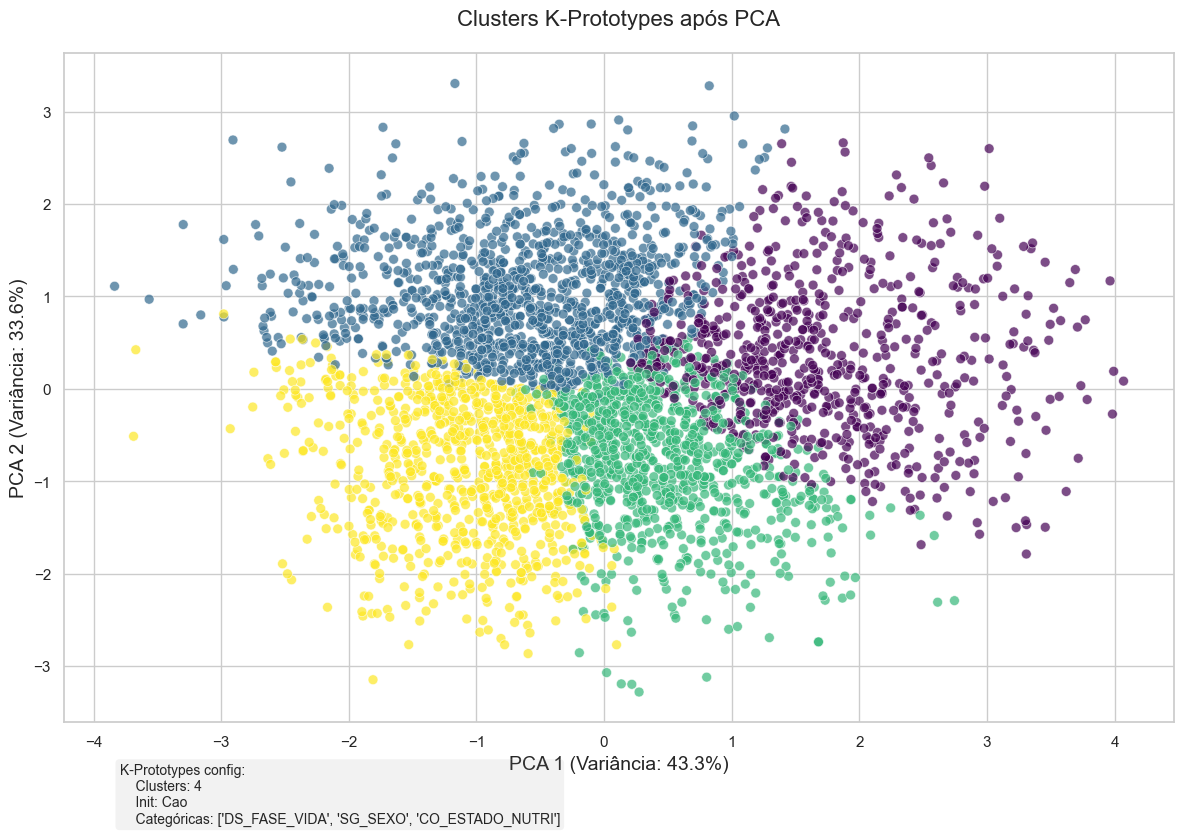

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações iniciais
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 1. Gráfico de dispersão principal (PCA)
scatter = plt.scatter(
    x=df_cluster['PCA_1'],
    y=df_cluster['PCA_2'],
    c=clusters_pca,
    cmap='viridis',  # Melhorar o mapa de cores
    alpha=0.7,
    s=50,
    edgecolor='w',
    linewidth=0.5
)

# 2. Adicionar informação categórica com marcadores diferentes (Sexo)
marker_map = {
    'Masculino': 'o',  # Marcador 'o' para Masculino
    'Feminino': 's',   # Marcador 's' para Feminino
}

# Adicionar marcação dos pontos de acordo com a categoria de Sexo
for cat_value, marker in marker_map.items():
    subset = df_cluster[df_cluster['SG_SEXO'] == cat_value]
    plt.scatter(
        x=subset['PCA_1'],
        y=subset['PCA_2'],
        c=subset.index.map(lambda x: clusters_pca[x]),  # Usando os clusters para colorir
        cmap='viridis',
        marker=marker,
        alpha=0.7,
        s=80,  # Aumentando o tamanho dos marcadores
        edgecolor='w',
        linewidth=0.8
    )

# 3. Elementos gráficos
plt.title('Clusters K-Prototypes após PCA', fontsize=16, pad=20)
plt.xlabel(f'PCA 1 (Variância: {pca.explained_variance_ratio_[0]:.1%})', fontsize=14)
plt.ylabel(f'PCA 2 (Variância: {pca.explained_variance_ratio_[1]:.1%})', fontsize=14)

# 4. Legenda personalizada para os clusters (somente)
cluster_legend = plt.legend(
    handles=scatter.legend_elements()[0],
    title='Clusters',
    loc='upper right',
    bbox_to_anchor=(1.25, 1),
    fontsize=12
)

plt.gca().add_artist(cluster_legend)

plt.tight_layout()

# 5. Anotação adicional com configurações do K-Prototypes
plt.annotate(
    f"""K-Prototypes config:
    Clusters: {kproto_pca.n_clusters}
    Init: {kproto_pca.init}
    Categóricas: {colunas_categoricas}""",
    xy=(0.05, -0.15),
    xycoords='axes fraction',
    fontsize=10,
    bbox=dict(boxstyle="round", alpha=0.1, facecolor="gray")
)

# Exibe o gráfico
plt.show()


## 4.3 Kmeans

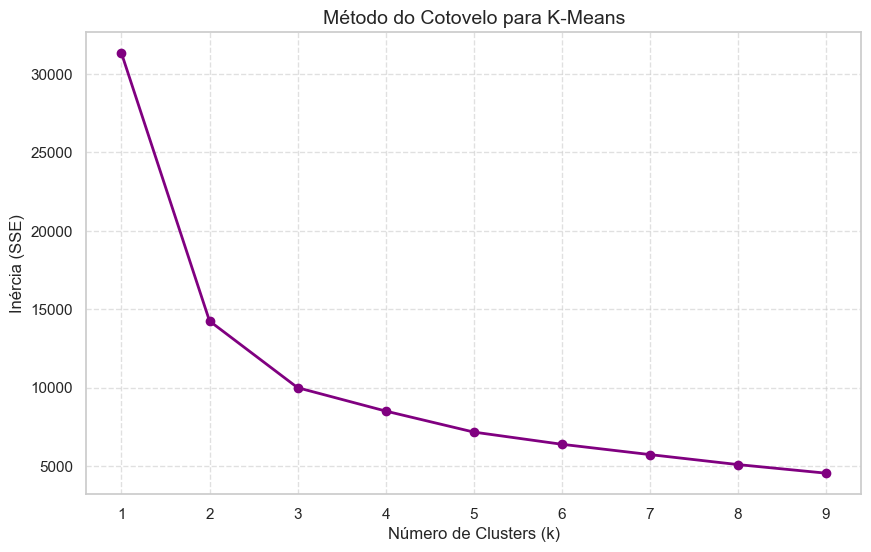

In [ ]:
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Seleciona apenas colunas numéricas
colunas_numericas = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']
df_numerico = df_normalized[colunas_numericas]

# Lista para armazenar a inércia (SSE)
inercia = []

# Faixa de valores de k para testar
faixa_k = range(1, 10)

# Aplica K-Means para cada k
for k in faixa_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_numerico)
    inercia.append(kmeans.inertia_)

# Plota o Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(faixa_k, inercia, marker='o', color='purple', linestyle='-', linewidth=2)  
plt.title('Método do Cotovelo para K-Means', fontsize=14)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia (SSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  
plt.show()

In [87]:
from sklearn.cluster import KMeans

# Seleciona as colunas para clusterização
colunas_clusterizar = ['NU_IDADE_ANO', 'DS_FASE_VIDA', 'SG_SEXO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC', 'CO_ESTADO_NUTRI']

# Obtém os dados normalizados
df_kmeans = df_normalized[colunas_clusterizar]

# Especifica o número de clusters desejado (k=3)
n_clusters_kmeans = 3

# Cria uma instância do KMeans
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)

# Aplica o KMeans aos dados
clusters_kmeans = kmeans.fit_predict(df_kmeans)

# Adiciona os rótulos dos clusters de volta ao DataFrame df_clusterization
df_kmeans['Cluster_Kmeans'] = clusters_kmeans

# Visualiza o resultado
df_kmeans

NU_IDADE_ANO  DS_FASE_VIDA  SG_SEXO   NU_PESO  NU_ALTURA    DS_IMC  \
0         0.071121             0        0 -1.286232  -0.650486 -1.154594   
1        -1.417755             0        0 -1.917052  -1.938020 -1.411469   
2        -1.417755             0        1 -0.311329   1.817289 -1.137695   
3        -1.179535             0        1 -0.024592  -0.114013  0.041901   
4        -0.405319             0        1  1.122353  -0.114013  1.329653   
...            ...           ...      ...       ...        ...       ...   
3831      1.024003             1        0  0.090102   0.958932 -0.389040   
3832      1.202668             1        1 -1.572968  -0.543191 -1.538216   
3833      0.309342             0        0  0.004081   0.529754 -0.267363   
3834      0.190232             0        0  0.090102   0.207871 -0.008798   
3835      0.428452             0        0 -1.469743  -1.079664 -1.193463   

      CO_ESTADO_NUTRI  Cluster_Kmeans  
0                   0               1  
1                   0               1  
2                   0               1  
3                   5               0  
4                   3               2  
...               ...             ...  
3831                0               1  
3832                1               1  
3833                5               0  
3834                5               0  
3835                0               1  

[3764 rows x 8 columns]

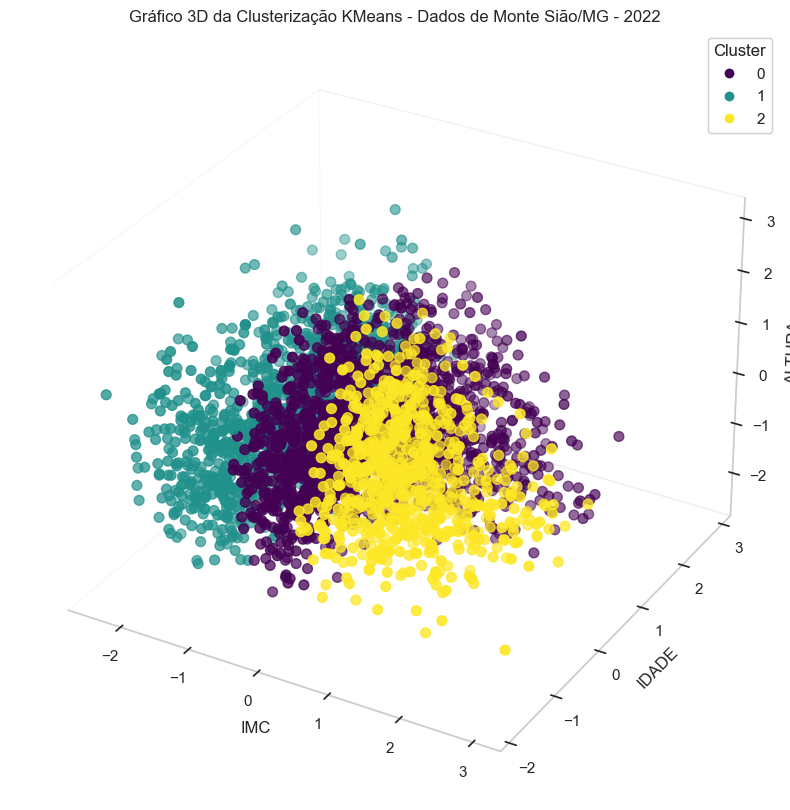

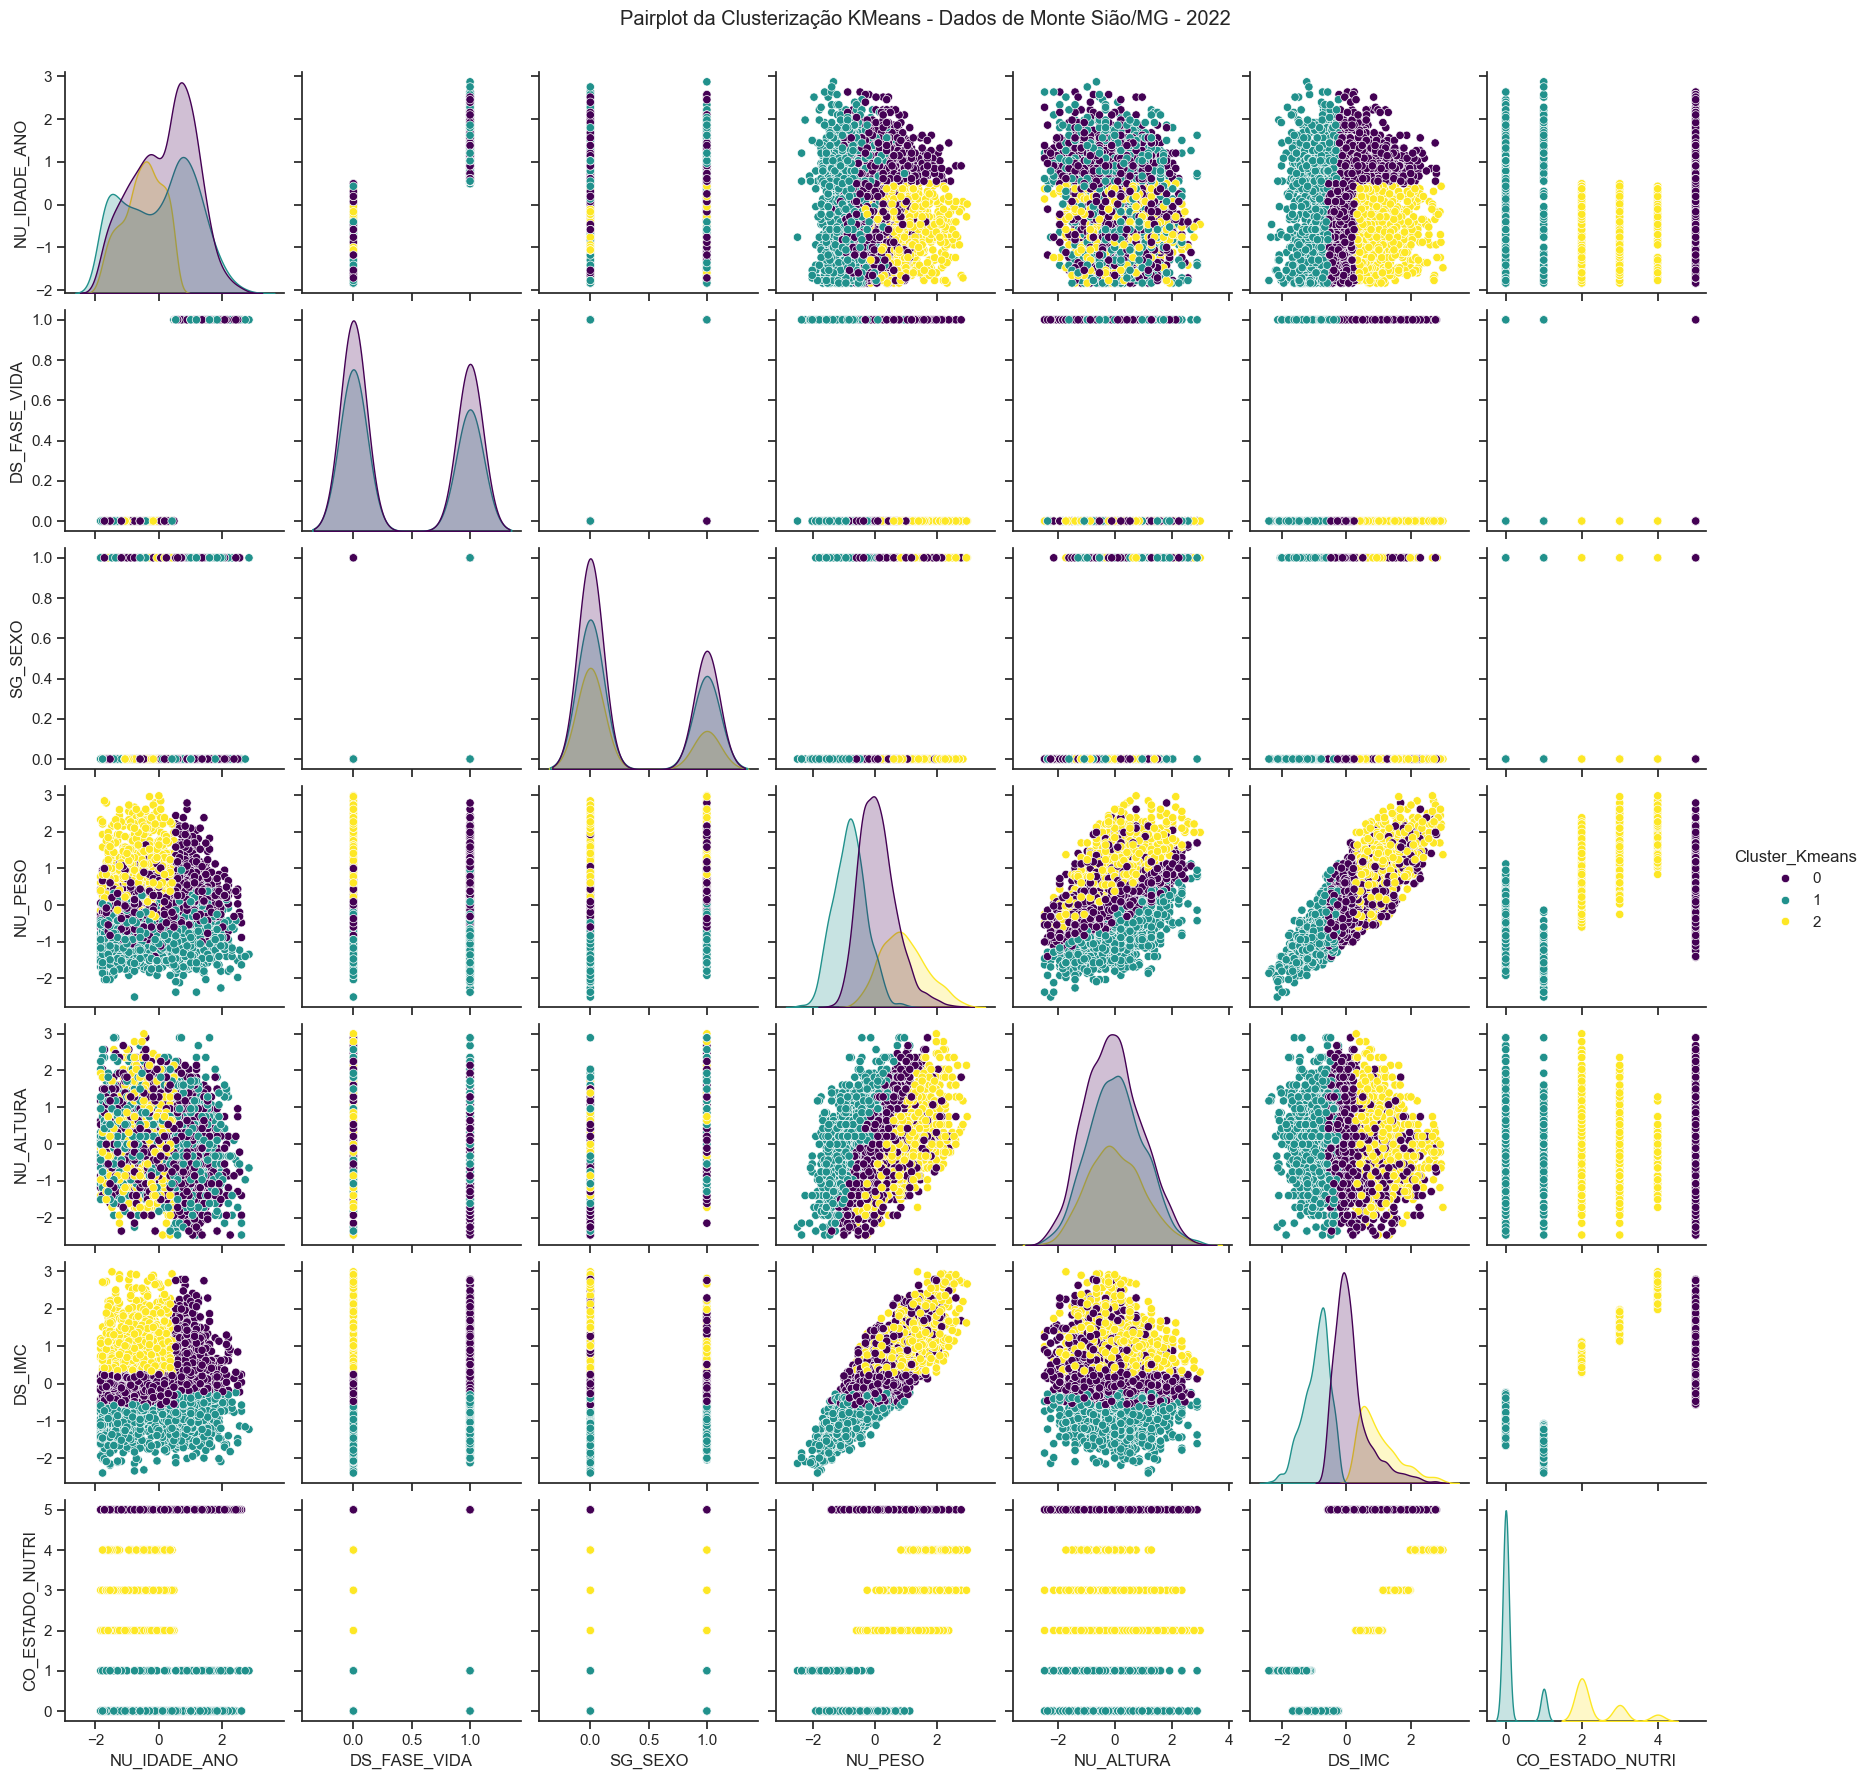

In [88]:
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')

# Cria um gráfico 3D para a clusterização KMeans
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_kmeans['DS_IMC'],
                     df_kmeans['NU_IDADE_ANO'],
                     df_kmeans['NU_ALTURA'],                             
                     c=df_kmeans['Cluster_Kmeans'],
                     cmap='viridis',
                     s=50)

ax.set_xlabel('IMC')
ax.set_ylabel('IDADE')
ax.set_zlabel('ALTURA')
ax.set_title('Gráfico 3D da Clusterização KMeans - Dados de Monte Sião/MG - 2022')

legend = ax.legend(*scatter.legend_elements(), title='Cluster', loc='upper right')
ax.add_artist(legend)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

plt.show()

# Cria um pairplot para a clusterização KMeans
sns.set(style="ticks")
sns.pairplot(df_kmeans, hue='Cluster_Kmeans', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot da Clusterização KMeans - Dados de Monte Sião/MG - 2022', y=1.02)
plt.show()


## 4.4 PCA - KMeans

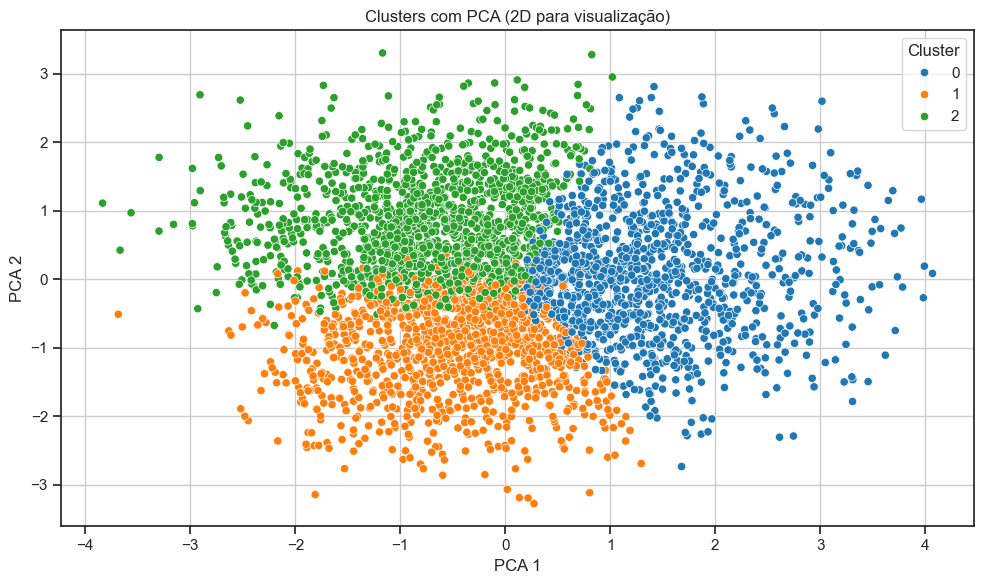

In [91]:
# 1. Copia o DataFrame normalizado
df_pca_kmeans = df_normalized.copy()

# 2. Define as colunas numéricas para aplicar PCA e clustering
colunas_numericas = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']

df_numerico = df_pca_kmeans[colunas_numericas]

# 3. Aplica PCA para reter 90% da variância
pca = PCA(n_components=0.9)
dados_reduzidos = pca.fit_transform(df_numerico)

# 4. Aplica KMeans com 3 clusters aos dados PCA-reduzidos
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dados_reduzidos)

# 5. Adiciona os rótulos dos clusters ao DataFrame de saída
df_pca_kmeans['Cluster_PCA_KMeans'] = clusters

# 6. (Opcional) Aplica PCA com 2 componentes só para visualização
pca_visual = PCA(n_components=2)
dados_visuais = pca_visual.fit_transform(df_numerico)

df_pca_kmeans['PCA_1'] = dados_visuais[:, 0]
df_pca_kmeans['PCA_2'] = dados_visuais[:, 1]

# 7. Visualização
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_kmeans, x='PCA_1', y='PCA_2', hue='Cluster_PCA_KMeans', palette='tab10')
plt.title('Clusters com PCA (2D para visualização)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

## 4.5 GMM

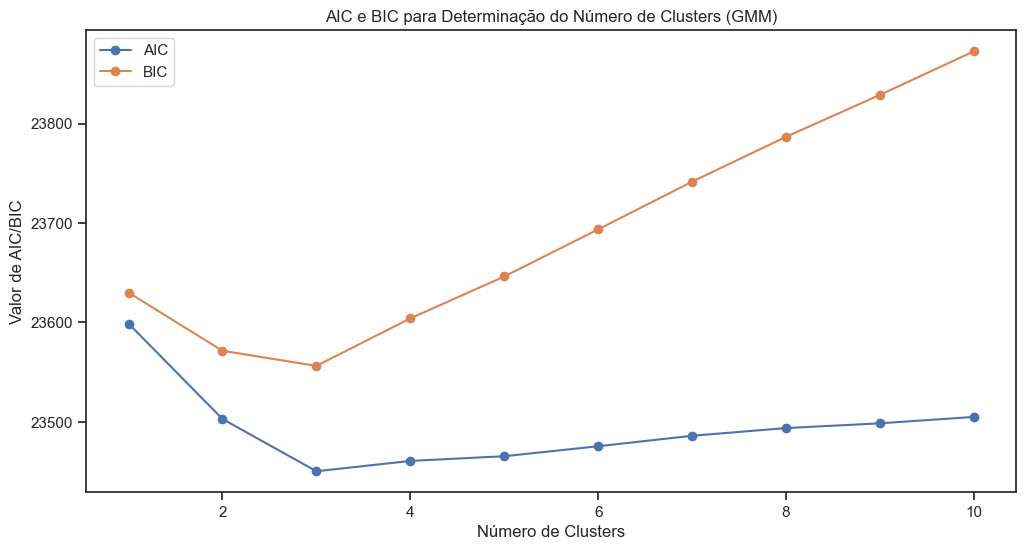

Número ideal de clusters segundo AIC: 3
Número ideal de clusters segundo BIC: 3


In [90]:
from sklearn.mixture import GaussianMixture

colunas_numericas = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']
df_gmm = df_normalized[colunas_numericas]

# Aplicando PCA (opcional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_gmm)

# Calculando AIC e BIC para diferentes números de componentes
aic_values = []
bic_values = []
n_components_range = range(1, 11)  # Testando de 1 a 10 clusters

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
    gmm.fit(X_pca)
    aic_values.append(gmm.aic(X_pca))
    bic_values.append(gmm.bic(X_pca))

# Plotando AIC e BIC para encontrar o número ideal de clusters
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic_values, label='AIC', marker='o')
plt.plot(n_components_range, bic_values, label='BIC', marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor de AIC/BIC')
plt.title('AIC e BIC para Determinação do Número de Clusters (GMM)')
plt.legend()
plt.show()

# Número ideal de clusters será aquele com menor AIC/BIC
optimal_clusters_aic = n_components_range[np.argmin(aic_values)]
optimal_clusters_bic = n_components_range[np.argmin(bic_values)]

print(f"Número ideal de clusters segundo AIC: {optimal_clusters_aic}")
print(f"Número ideal de clusters segundo BIC: {optimal_clusters_bic}")


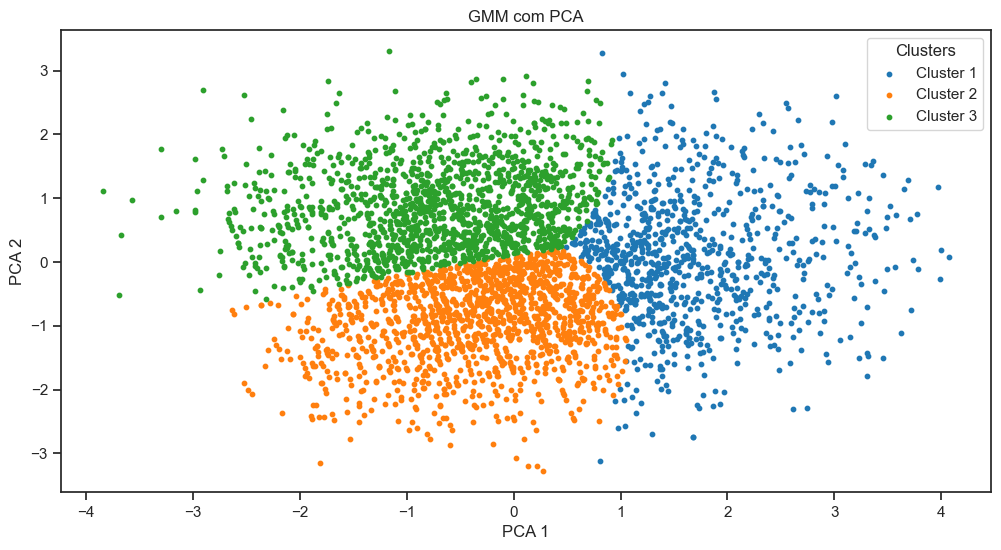

In [92]:
from sklearn.mixture import GaussianMixture

# 1. Criando uma cópia do df_normalized para preservar os dados originais
df_gmm = df_normalized.copy()

colunas_numericas = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']

df_gmm = df_gmm[colunas_numericas]

# 2. Aplicando PCA (redução para 2 componentes principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_gmm.drop(columns=['cluster_raw', 'cluster_pca', 'cluster_gmm'], errors='ignore'))

# 3. Criando o modelo GMM com 3 clusters (ajustável)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# 4. Adicionando os rótulos do GMM ao df_gmm
df_gmm['cluster_gmm'] = gmm_labels

# 5. Visualizando os clusters após PCA
plt.figure(figsize=(12, 6))

# Criando uma lista de cores para cada cluster
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Scatter plot com rótulos e cores personalizadas
for cluster_id in range(3): 
    plt.scatter(X_pca[gmm_labels == cluster_id, 0], X_pca[gmm_labels == cluster_id, 1],
                label=f'Cluster {cluster_id + 1}', color=colors[cluster_id], s=10)

# Adicionando título e rótulos
plt.title('GMM com PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Adicionando a legenda
plt.legend(title='Clusters')

# Exibindo o gráfico
plt.show()

# Seção 5 - Análise intracluster

## 5.1 Anexando melhor clusterização no df original

In [ ]:
# Copia a coluna Cluster_PCA_KPrototype para o DataFrame original df


In [93]:
df_gmm

NU_IDADE_ANO   NU_PESO  NU_ALTURA    DS_IMC  cluster_gmm
0         0.071121 -1.286232  -0.650486 -1.154594            2
1        -1.417755 -1.917052  -1.938020 -1.411469            1
2        -1.417755 -0.311329   1.817289 -1.137695            1
3        -1.179535 -0.024592  -0.114013  0.041901            1
4        -0.405319  1.122353  -0.114013  1.329653            0
...            ...       ...        ...       ...          ...
3831      1.024003  0.090102   0.958932 -0.389040            1
3832      1.202668 -1.572968  -0.543191 -1.538216            2
3833      0.309342  0.004081   0.529754 -0.267363            1
3834      0.190232  0.090102   0.207871 -0.008798            1
3835      0.428452 -1.469743  -1.079664 -1.193463            2

[3764 rows x 5 columns]

In [96]:
# 1. Mantém no df apenas os índices que também estão no df_gmm (ou seja, sem outliers)
df_filtrado = df.loc[df_gmm.index].copy()

# 2. Adiciona a coluna de cluster do df_gmm para o df_filtrado
df_filtrado['cluster_gmm'] = df_gmm['cluster_gmm']

df_filtrado

CO_ACOMPANHAMENTO  \
0     455FA09C6AE623A008EED25FF3B1ADB19290D9D7   
1     70BFCE196D8345BDF4D641B04C4F4E6E19C0B289   
2     67A340F29461447555E52D92D8ADD66D703398F6   
3     458B0450884D0F5CFA443D518E652EAC4CCDAE63   
4     B85162FD6C466A82908E9DC95574838304BDD0B5   
...                                        ...   
3831  495FAD886AB05384ECB278CAD674B8EE3D43E1E3   
3832  826B1BC53757CD481D13A54D864F385D0B651B6C   
3833  4AFC9710314E7F621FA1F6B796861E4DDF6D96E8   
3834  D3F577DB143CDDFC7BC37E429F3E34EBC2C3F70B   
3835  980A1BEC96E7C8B0BE318251A343ED7F66B88042   

                              CO_PESSOA_SISVAN    CO_CNES  NU_IDADE_ANO  \
0     B5680467DA7144DF565999BDCB6E8195BECDB689  2795396.0            52   
1     1DC24A843C4347557763139BA3660306D5651277  2795396.0            27   
2     56305BAB97DC8C5CD87469151615228CCC842BC4  2795396.0            27   
3     7E50D21C7FD1A9F2BD50135670DD3ABAA1E58966  2795396.0            31   
4     64B00DA39AB2AF5FAD42E8F34D76F6380C341FB2  2795396.0            44   
...                                        ...        ...           ...   
3831  51C3079966C1F6BABECDB4652AD3D0C302D594A7  7780311.0            68   
3832  8BD31B1DCA2F42271A79F48141331E60B127924C  6373488.0            71   
3833  0E9ED48DFC8446E8A92C45E2BA8A2872CEFC401C  2212889.0            56   
3834  3AA3F4C359128FE737865105614C27AD78D6FBFC  2213087.0            54   
3835  66FE82C291862A152DE11EB004B1E0FC73EF3986  2212889.0            58   

     DS_FASE_VIDA SG_SEXO DT_ACOMPANHAMENTO  NU_COMPETENCIA  NU_PESO  \
0          ADULTO       F        2022-01-07          202201     53.0   
1          ADULTO       F        2022-01-20          202201     42.0   
2          ADULTO       M        2022-01-17          202201     70.0   
3          ADULTO       M        2022-01-19          202201     75.0   
4          ADULTO       M        2022-01-17          202201     95.0   
...           ...     ...               ...             ...      ...   
3831        IDOSO       F        2022-12-15          202212     77.0   
3832        IDOSO       M        2022-12-22          202212     48.0   
3833       ADULTO       F        2022-12-14          202212     75.5   
3834       ADULTO       F        2022-12-26          202212     77.0   
3835       ADULTO       F        2022-12-08          202212     49.8   

      NU_ALTURA  DS_IMC        CO_ESTADO_NUTRI  ANO_ACOMPANHAMENTO  \
0         157.0   21.50  Adequado ou eutrófico                2022   
1         145.0   19.98  Adequado ou eutrófico                2022   
2         180.0   21.60  Adequado ou eutrófico                2022   
3         162.0   28.58              Sobrepeso                2022   
4         162.0   36.20      Obesidade Grau II                2022   
...         ...     ...                    ...                 ...   
3831      172.0   26.03  Adequado ou eutrófico                2022   
3832      158.0   19.23             Baixo peso                2022   
3833      168.0   26.75              Sobrepeso                2022   
3834      165.0   28.28              Sobrepeso                2022   
3835      153.0   21.27  Adequado ou eutrófico                2022   

      cluster_gmm  
0               2  
1               1  
2               1  
3               1  
4               0  
...           ...  
3831            1  
3832            2  
3833            1  
3834            1  
3835            2  

[3764 rows x 14 columns]


📊 Análise do Cluster 0:

       NU_IDADE_ANO     NU_PESO   NU_ALTURA      DS_IMC
count         884.0  884.000000  884.000000  884.000000
mean      47.227376   95.607975  168.805430   33.789367
std       14.257592    9.469350    8.908528    4.556944
min            20.0   76.000000  145.000000   21.730000
25%            37.0   88.000000  162.000000   30.440000
50%            46.0   93.000000  169.000000   33.200000
75%            59.0  101.000000  175.000000   36.760000
max            86.0  127.400000  191.000000   46.000000


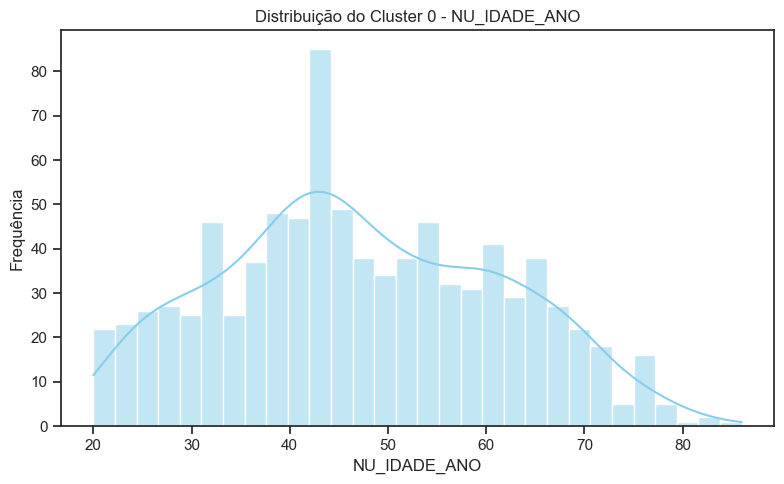

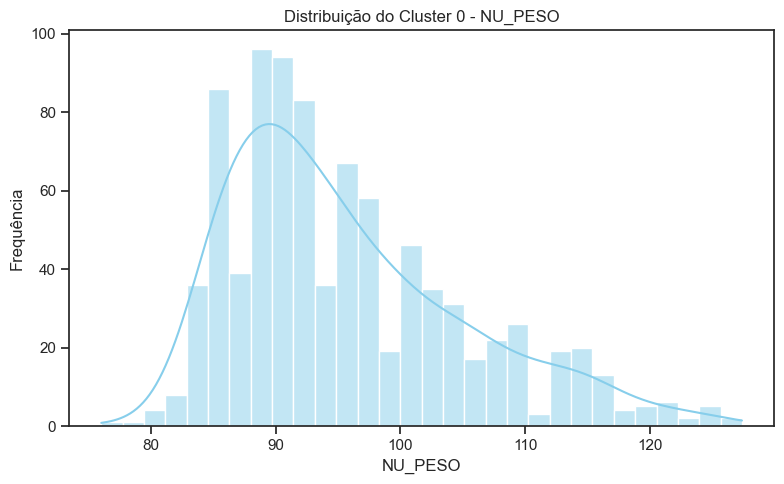

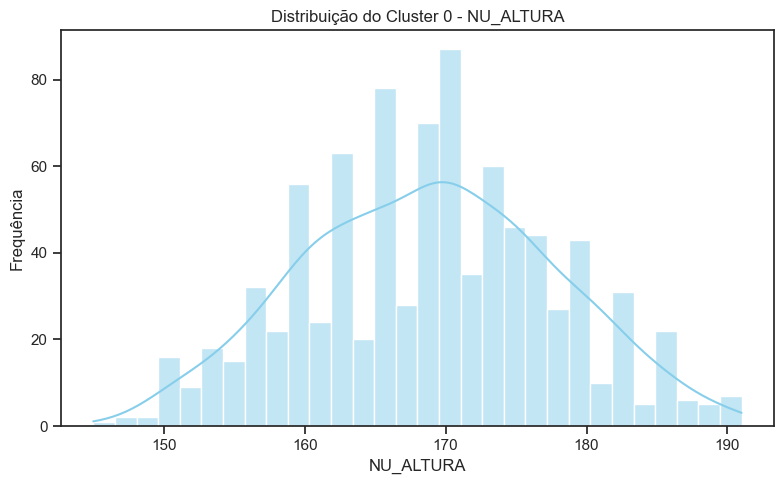

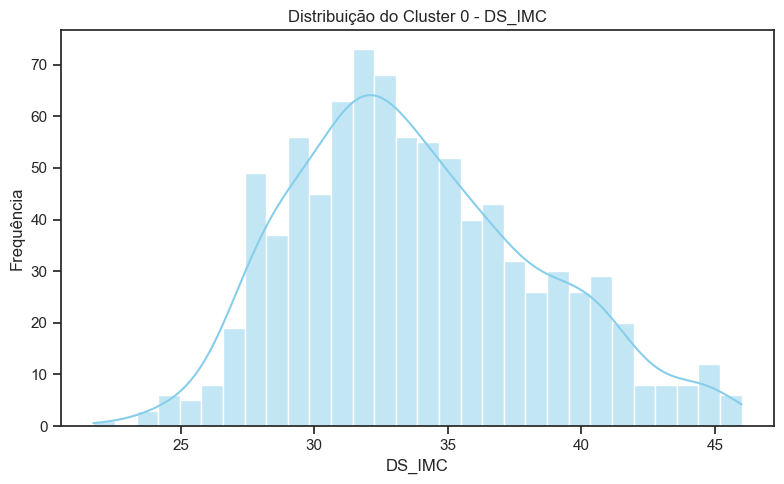


📊 Análise do Cluster 1:

       NU_IDADE_ANO      NU_PESO    NU_ALTURA       DS_IMC
count        1422.0  1422.000000  1422.000000  1422.000000
mean      39.680028    68.100914   166.049015    24.700499
std       13.139253     9.718394     7.056835     3.277266
min            20.0    40.000000   145.000000    14.200000
25%            29.0    62.000000   161.000000    22.580000
50%            38.0    69.000000   165.000000    24.840000
75%            49.0    76.000000   171.000000    27.100000
max            86.0    85.000000   190.000000    33.750000


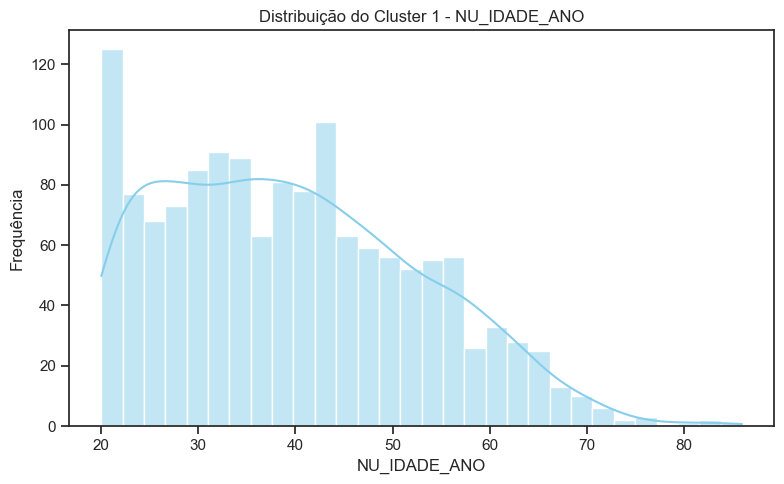

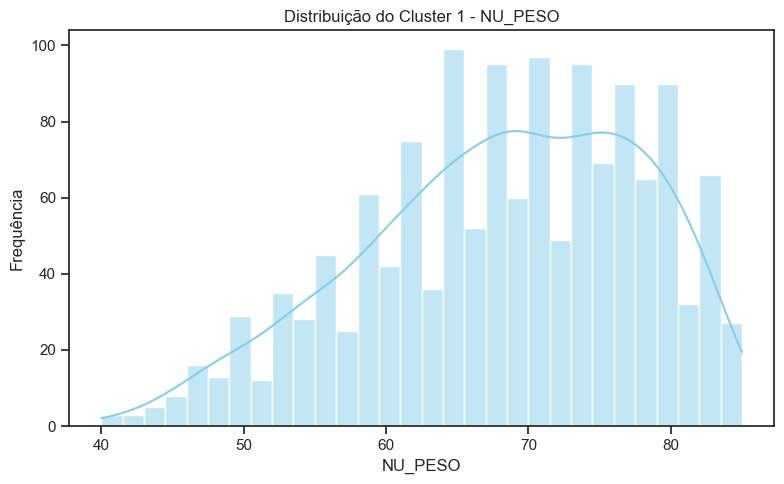

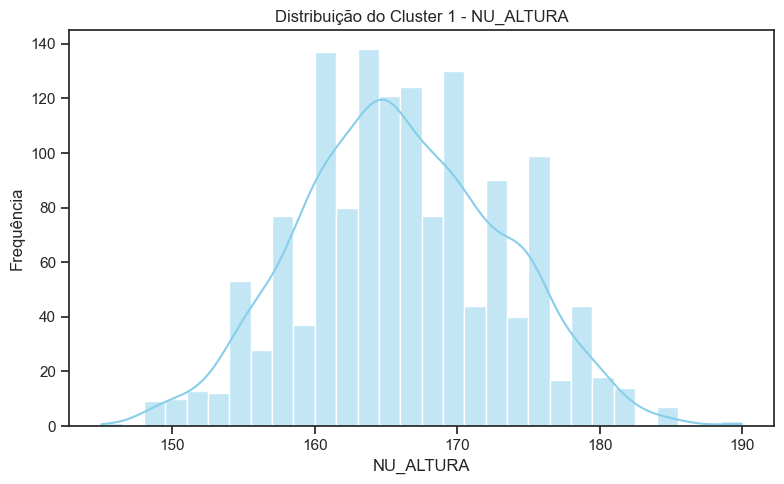

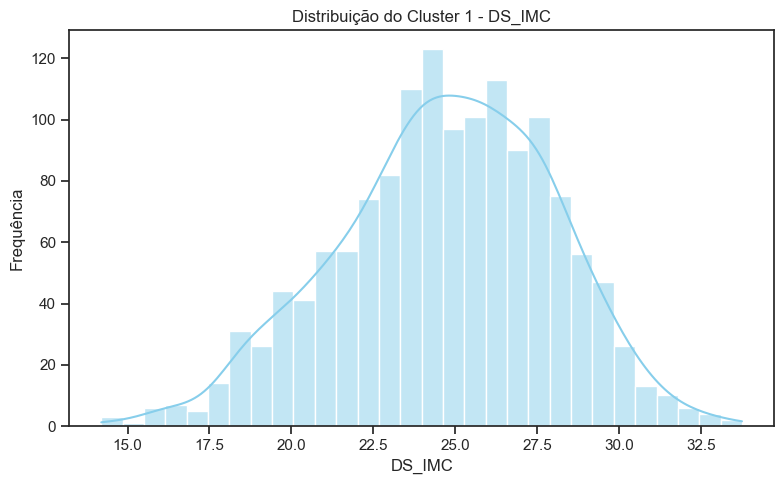


📊 Análise do Cluster 2:

       NU_IDADE_ANO      NU_PESO    NU_ALTURA       DS_IMC
count        1458.0  1458.000000  1458.000000  1458.000000
mean      64.032236    67.764746   156.440672    27.715713
std       11.772654    10.346892     6.593456     4.177801
min            27.0    31.700000   140.000000    15.720000
25%            57.0    61.000000   152.000000    24.925000
50%            64.0    68.000000   156.000000    27.620000
75%            72.0    76.000000   161.000000    30.490000
max            99.0    89.000000   177.000000    40.900000


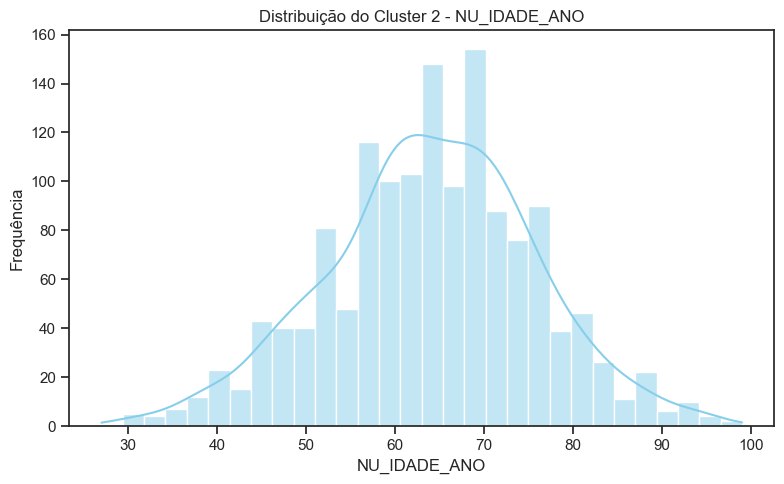

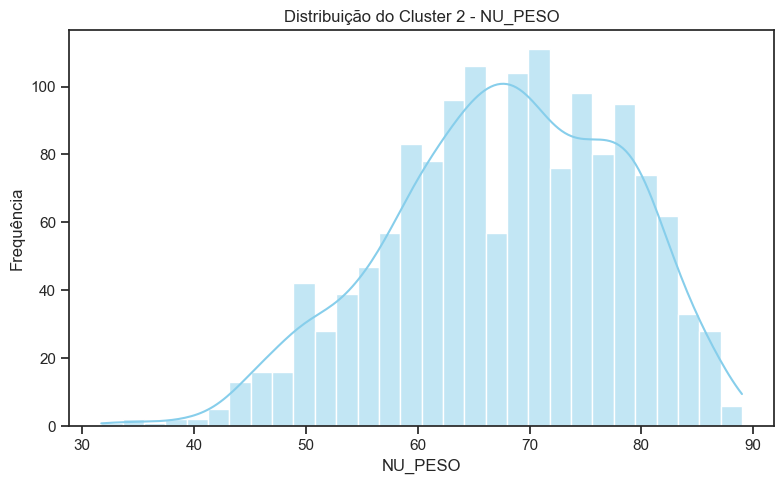

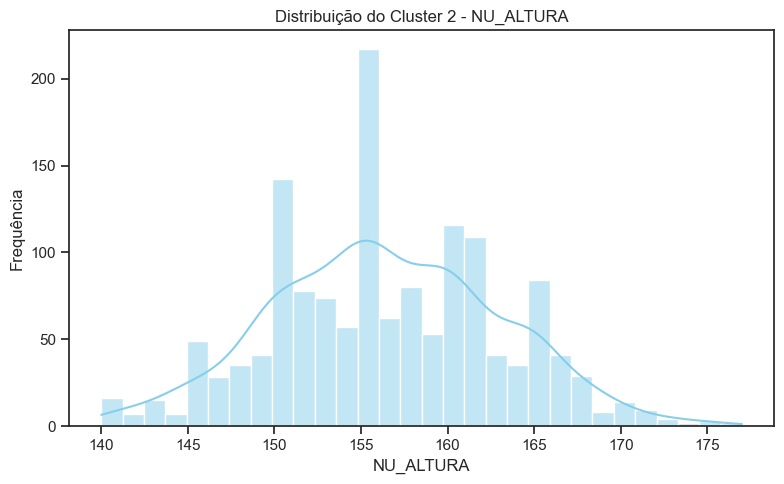

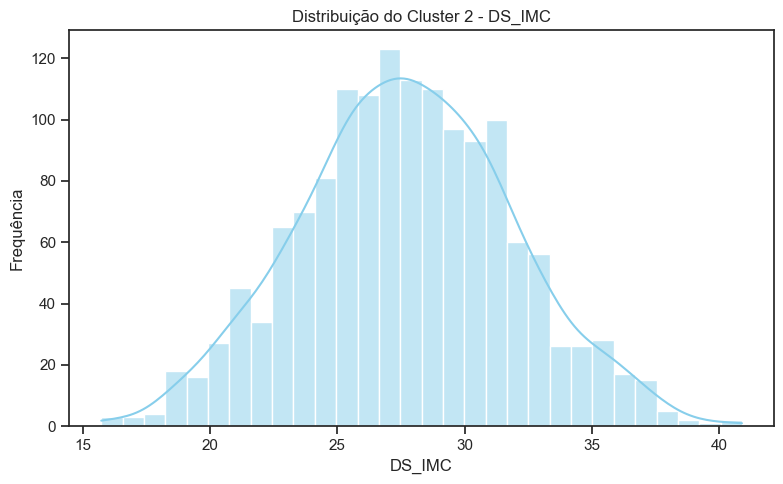

In [97]:
# Colunas a excluir do df original (se ainda estiverem presentes)
columns_to_exclude = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
cluster_df = df_filtrado.drop(columns=[col for col in columns_to_exclude if col in df_filtrado.columns])

# Seleciona apenas colunas numéricas e a coluna do cluster
numeric_columns = ['NU_IDADE_ANO', 'NU_PESO', 'NU_ALTURA', 'DS_IMC']
cluster_column = 'cluster_gmm'

# Garante que a coluna de cluster está no DataFrame
if cluster_column not in cluster_df.columns:
    raise ValueError(f"Coluna de cluster '{cluster_column}' não encontrada no DataFrame.")

# Filtra o DataFrame para análise
cluster_df_numeric = cluster_df[numeric_columns + [cluster_column]].dropna()

# Função para análise intracluster
def intracluster_analysis(data, cluster_column):
    clusters_grouped = data.groupby(cluster_column)

    for cluster, cluster_data in clusters_grouped:
        print(f"\n📊 Análise do Cluster {cluster}:\n")
        print(cluster_data[numeric_columns].describe())

        # Gráficos de distribuição
        for column in numeric_columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(cluster_data[column], kde=True, bins=30, color='skyblue')
            plt.title(f'Distribuição do Cluster {cluster} - {column}')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.tight_layout()
            plt.show()

# Executa a análise
intracluster_analysis(cluster_df_numeric, cluster_column)


📊 Análise do Cluster 0 - Colunas Categóricas:


Contagem em 'DS_FASE_VIDA':
DS_FASE_VIDA
ADULTO    678
IDOSO     206
Name: count, dtype: int64

Contagem em 'SG_SEXO':
SG_SEXO
M    451
F    433
Name: count, dtype: int64

Contagem em 'CO_ESTADO_NUTRI':
CO_ESTADO_NUTRI
Sobrepeso                317
Obesidade Grau I         306
Obesidade Grau II        169
Obesidade Grau III        76
Adequado ou eutrófico     16
Name: count, dtype: int64


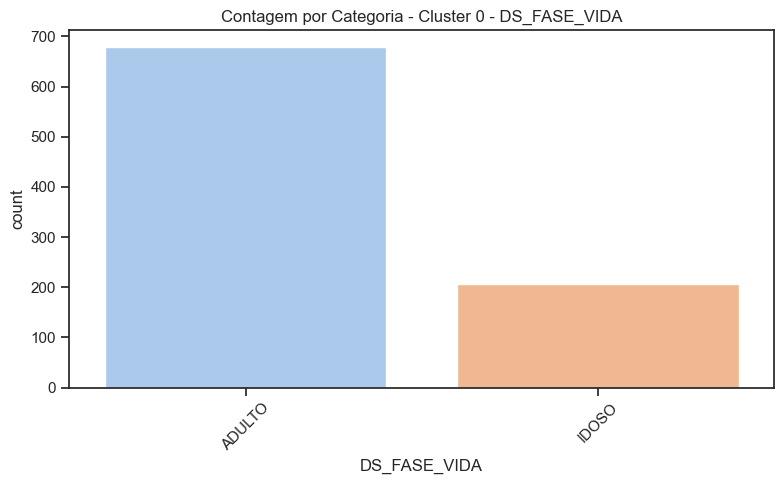

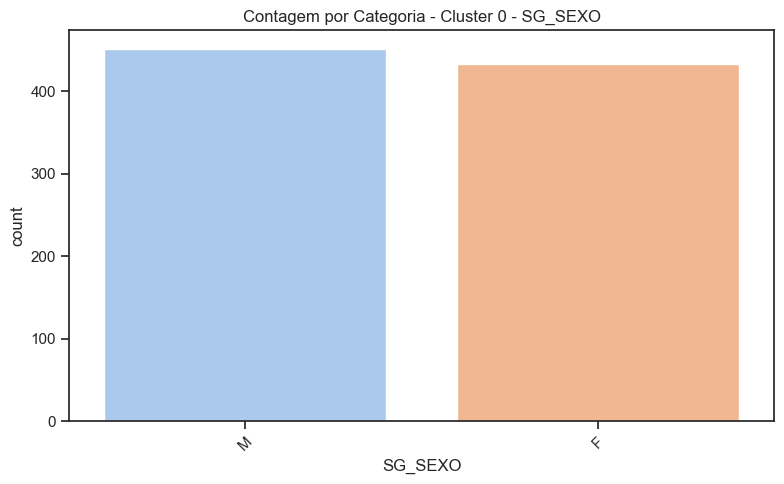

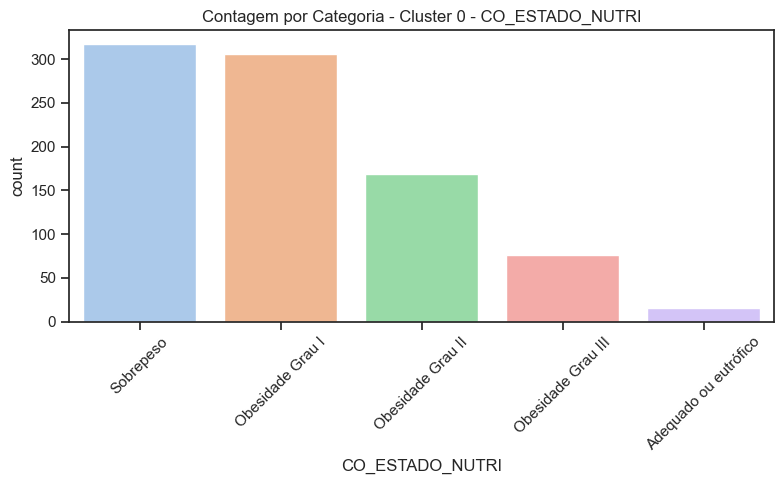


📊 Análise do Cluster 1 - Colunas Categóricas:


Contagem em 'DS_FASE_VIDA':
DS_FASE_VIDA
ADULTO    1297
IDOSO      125
Name: count, dtype: int64

Contagem em 'SG_SEXO':
SG_SEXO
F    915
M    507
Name: count, dtype: int64

Contagem em 'CO_ESTADO_NUTRI':
CO_ESTADO_NUTRI
Adequado ou eutrófico    681
Sobrepeso                607
Baixo peso                74
Obesidade Grau I          60
Name: count, dtype: int64


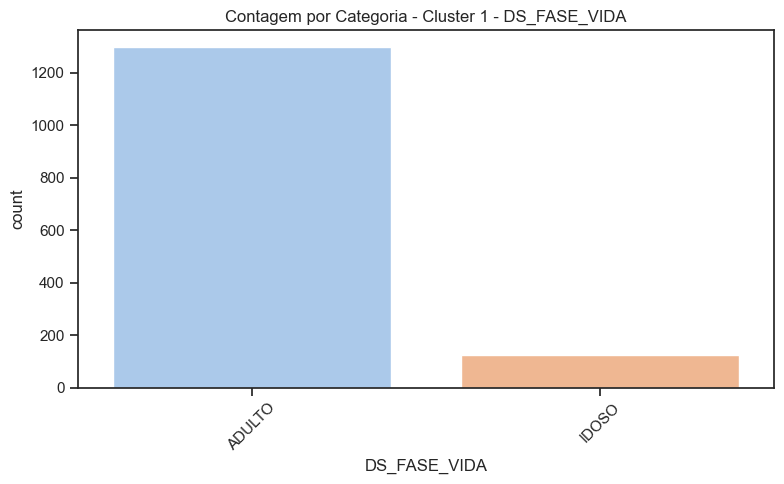

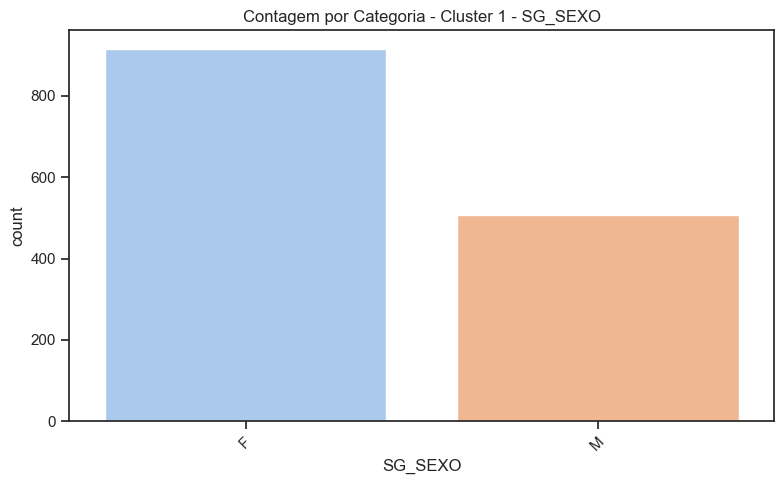

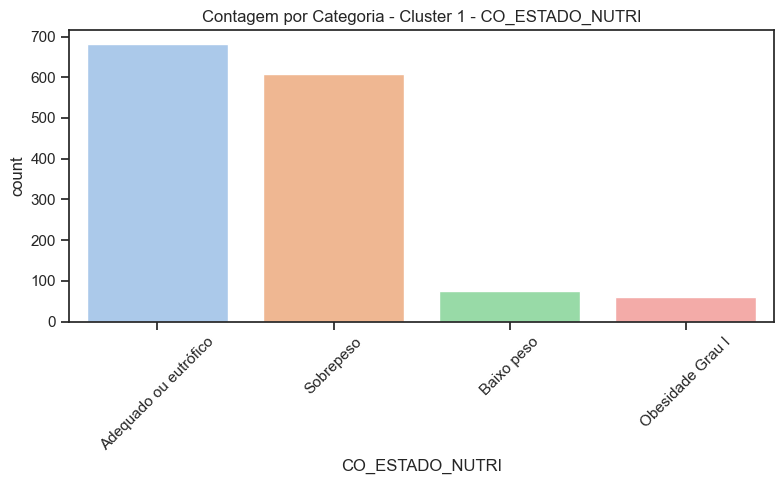


📊 Análise do Cluster 2 - Colunas Categóricas:


Contagem em 'DS_FASE_VIDA':
DS_FASE_VIDA
IDOSO     976
ADULTO    482
Name: count, dtype: int64

Contagem em 'SG_SEXO':
SG_SEXO
F    1097
M     361
Name: count, dtype: int64

Contagem em 'CO_ESTADO_NUTRI':
CO_ESTADO_NUTRI
Sobrepeso                753
Adequado ou eutrófico    444
Obesidade Grau I         139
Baixo peso               101
Obesidade Grau II         21
Name: count, dtype: int64


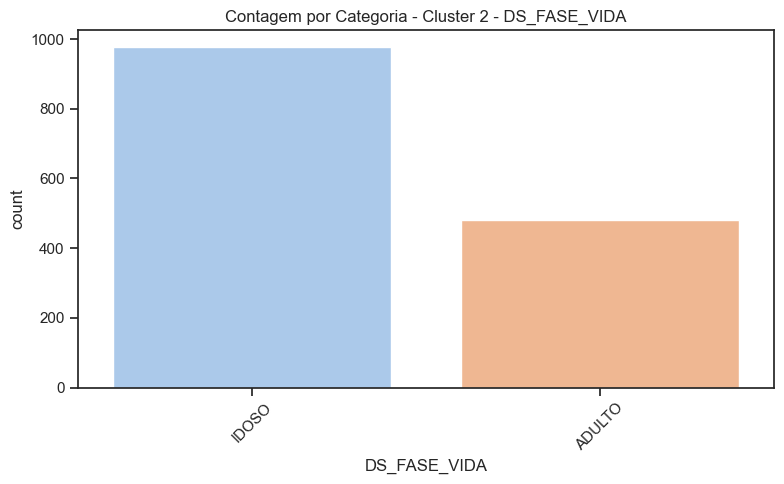

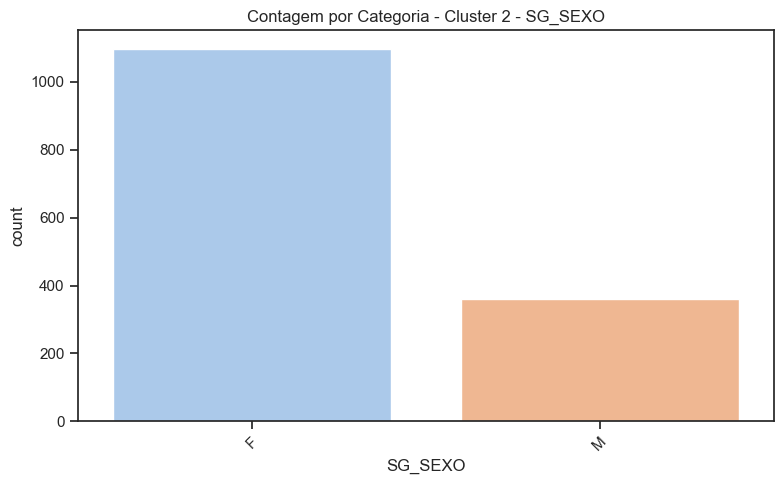

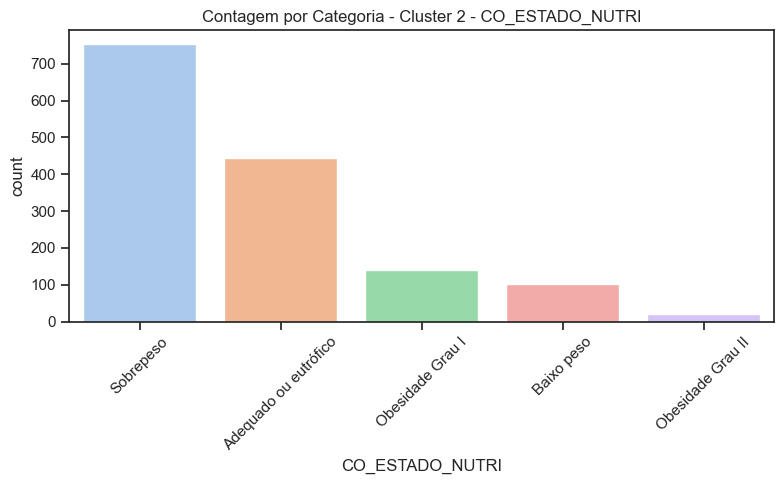

In [99]:
# Colunas a excluir do DataFrame original
columns_to_exclude = ['CO_CNES', 'DT_ACOMPANHAMENTO', 'NU_COMPETENCIA']
cluster_column = 'cluster_gmm'

# Colunas categóricas a serem analisadas
categorical_columns = ['DS_FASE_VIDA', 'SG_SEXO', 'CO_ESTADO_NUTRI']

# Garante que todas as colunas categóricas + cluster estão presentes
categorical_columns_valid = [col for col in categorical_columns if col in df_filtrado.columns]

if cluster_column not in df_filtrado.columns:
    raise ValueError(f"Coluna de cluster '{cluster_column}' não encontrada no DataFrame.")

# Filtra o DataFrame
cluster_df = df_filtrado.drop(columns=[col for col in columns_to_exclude if col in df_filtrado.columns])
cluster_df_categorical = cluster_df[categorical_columns_valid + [cluster_column]].dropna()

# Função de análise intracluster categórica
def intracluster_categorical_analysis(data, cluster_column):
    clusters_grouped = data.groupby(cluster_column)
    
    for cluster, cluster_data in clusters_grouped:
        print(f"\n📊 Análise do Cluster {cluster} - Colunas Categóricas:\n")
        
        # Contagem de valores
        for column in categorical_columns_valid:
            print(f"\nContagem em '{column}':")
            print(cluster_data[column].value_counts())
        
        # Gráficos de contagem
        for column in categorical_columns_valid:
            plt.figure(figsize=(8, 5))
            sns.countplot(x=column, data=cluster_data, order=cluster_data[column].value_counts().index, palette="pastel")
            plt.title(f'Contagem por Categoria - Cluster {cluster} - {column}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# Executa a análise
intracluster_categorical_analysis(cluster_df_categorical, cluster_column)

# 5.2 Relatório de Análise de Clusterização

## Introdução

Este relatório apresenta uma análise detalhada da clusterização realizada com o modelo **Gaussian Mixture Model (GMM)** aplicada a um conjunto de dados contendo características físicas e demográficas de indivíduos. A clusterização resultou em **três agrupamentos distintos**, cada um com perfis específicos, revelando padrões relevantes para interpretações clínicas, sociais e estratégicas.

---

## **Cluster 0**

### **Perfil Numérico:**
- **Idade Média:** 47,23 anos
- **Peso Médio:** 95,61 kg
- **Altura Média:** 168,81 cm
- **IMC Médio:** 33,79

### **Observações:**
- Faixa etária abrangendo adultos jovens a adultos de meia-idade (20 a 69 anos), representando um grupo heterogêneo.
- Peso e IMC elevados, sugerindo prevalência de obesidade.
- Altura média dentro da faixa esperada, sem extremos.

### **Perfil Categórico:**
- **Fase de Vida:**
  - Adulto: 678
  - Idoso: 206
- **Sexo:**
  - Masculino: 451
  - Feminino: 433
- **Estado Nutricional:**
  - Sobrepeso: 317
  - Obesidade Grau I: 306
  - Obesidade Grau II: 169
  - Obesidade Grau III: 76
  - Adequado ou eutrófico: 16

### **Perfil Principal:**
- **Fase de Vida Predominante:** Adulto Jovem a Meia Idade
- **Sexo Predominante:** Masculino
- **Estado Nutricional Predominante:** Sobrepeso a Obesidade Moderada
- **Estatura:** Normal a levemente elevada
- **Destaque:** Grupo com maiores valores médios de peso e IMC entre os clusters

---

## **Cluster 1**

### **Perfil Numérico:**
- **Idade Média:** 39,68 anos
- **Peso Médio:** 68,10 kg
- **Altura Média:** 166,05 cm
- **IMC Médio:** 24,70

### **Observações:**
- Faixa etária mais jovem entre os clusters.
- Valores médios equilibrados de peso, altura e IMC.
- Representa o perfil mais próximo do eutrofismo.

### **Perfil Categórico:**
- **Fase de Vida:**
  - Adulto: 1297
  - Idoso: 125
- **Sexo:**
  - Feminino: 915
  - Masculino: 507
- **Estado Nutricional:**
  - Adequado ou eutrófico: 681
  - Sobrepeso: 607
  - Baixo peso: 74
  - Obesidade Grau I: 60

### **Perfil Principal:**
- **Fase de Vida Predominante:** Adulto Jovem
- **Sexo Predominante:** Feminino
- **Estado Nutricional Predominante:** Eutrófico a Sobrepeso
- **Estatura:** Normal
- **Destaque:** Grupo com melhor perfil nutricional e menor IMC médio

---

## **Cluster 2**

### **Perfil Numérico:**
- **Idade Média:** 64,03 anos
- **Peso Médio:** 67,76 kg
- **Altura Média:** 156,44 cm
- **IMC Médio:** 27,72

### **Observações:**
- Faixa etária mais elevada, com predominância de idosos.
- Altura mais baixa e IMC moderadamente elevado.
- Peso dentro da normalidade para a idade.

### **Perfil Categórico:**
- **Fase de Vida:**
  - Idoso: 976
  - Adulto: 482
- **Sexo:**
  - Feminino: 1097
  - Masculino: 361
- **Estado Nutricional:**
  - Sobrepeso: 753
  - Adequado ou eutrófico: 444
  - Obesidade Grau I: 139
  - Baixo peso: 101
  - Obesidade Grau II: 21

### **Perfil Principal:**
- **Fase de Vida Predominante:** Idoso
- **Sexo Predominante:** Feminino
- **Estado Nutricional Predominante:** Sobrepeso
- **Estatura:** Baixa
- **Destaque:** Grupo mais envelhecido e mais feminino entre os clusters

---

## **Conclusão**

A análise dos clusters destaca variações significativas nos perfis demográficos, físicos e nutricionais entre os agrupamentos, evidenciando a eficácia da clusterização para identificar grupos distintos e suas características específicas.

- **Cluster 0** é composto por uma faixa etária heterogênea, com indivíduos variando de jovens adultos a meia-idade (20 a 69 anos), e predominância masculina. Este grupo apresenta **altos valores de peso e IMC**, com um perfil nutricional caracterizado por **sobrepeso e obesidade moderada**.
  
- **Cluster 1** consiste principalmente de **adultos jovens**, com uma idade média de 39,68 anos. O perfil desse cluster é mais equilibrado, com **valores moderados de peso e IMC**, e predominância de indivíduos **eutróficos a sobrepeso**, especialmente entre as mulheres.

- **Cluster 2** é dominado por **indivíduos mais velhos**, com uma média de 64,03 anos, e um perfil nutricional caracterizado por **sobrepeso**. A maior parte desse grupo é composta por **mulheres idosas**, com IMC moderadamente elevado e uma **estatura mais baixa**.

Essas análises detalhadas oferecem uma compreensão mais específica dos clusters formados, possibilitando a personalização eficaz de **estratégias de intervenção** para atender às necessidades específicas de cada grupo identificado.

# Referencias 

H. Huang, Z. Xu, and C. Zeng. An Enhanced k-prototype Algorithm for Clustering Categorical Data, Engineering Applications of Artificial Intelligence, 71, 106-116 (2018).

 Zhexue Huang. Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values, Data Mining and Knowledge Discovery, 2, 283–304 (1998).

Jolliffe, I. T. (2002). Principal Component Analysis. Wiley.

Tzung-Pei Hong, Chia-Hsiu Chen, Chia-Hui Chang. (2015). K-Prototypes: A Generalized Biclustering Algorithm. IEEE Transactions on Knowledge and Data Engineering, 27(3), 577-590.